## Problem Statement:

#### Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

##### Prediction :   Making two prediction  1) Fuel Type   2) capacity_mw

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scikitplot as skplt
sns.set(color_codes = True)
import missingno as msno

#Importing DataCleaning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder


import joblib

In [2]:
#Loading Dataset
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv",sep=",")
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

                     geolocation_source  wepp_id year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                   NaN   
1                                   WRI      NaN                   NaN   
2                                   WRI      NaN                   NaN   
3                                   WRI      NaN                2018.0   
4                                   WRI      NaN                2018.0   

  generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3          631.777928          617.789264             843.747   
4         1668.290000         3035.550000            5916.370   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           886.004428           663.774500  Central Electricity Authority   
4          6243.000000          5385.579736  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 25 columns]

In [3]:
print("Shape of our dataset is : ",df.shape)

Shape of our dataset is :  (908, 25)


### About Dataset : 

The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
-  `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh ` (text): attribution for the reported estimated generation information

In [4]:
#Analysing Datatypes in our dataset and Checking for null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

### Exploratory Data Analysis (EDA)

In [5]:
#Statistical Analysis of Numerical Features in our dataset
df.describe()

capacity_mw    latitude   longitude  other_fuel3  commissioning_year  \
count   908.000000  862.000000  862.000000          0.0          528.000000   
mean    321.046378   21.196189   77.447848          NaN         1996.876894   
std     580.221767    6.248627    4.907260          NaN           17.047817   
min       0.000000    8.168900   68.644700          NaN         1927.000000   
25%      16.837500   16.771575   74.258975          NaN         1988.000000   
50%      60.000000   21.778300   76.719250          NaN         2000.000000   
75%     388.125000   25.516375   79.441475          NaN         2011.250000   
max    4760.000000   34.649000   95.408000          NaN         2018.000000   

       wepp_id  year_of_capacity_data  generation_gwh_2013  \
count      0.0                  520.0           384.000000   
mean       NaN                 2018.0          2304.059202   
std        NaN                    0.0          3794.767492   
min        NaN                 2018.0             0.000000   
25%        NaN                 2018.0           244.458088   
50%        NaN                 2018.0           797.063475   
75%        NaN                 2018.0          2795.021500   
max        NaN                 2018.0         27586.200000   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           401.000000           425.000000           437.000000   
mean           2420.393316          2414.072373          2453.936292   
std            4013.558173          4183.203199          4152.038216   
min               0.000000             0.000000             0.000000   
25%             223.650436           174.174750           187.193669   
50%             805.760000           701.027250           716.728350   
75%            3034.575000          3080.000000          3263.483000   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  estimated_generation_gwh  
count           443.000000                       0.0  
mean           2531.754458                       NaN  
std            4187.236364                       NaN  
min               0.000000                       NaN  
25%             177.643170                       NaN  
50%             807.601700                       NaN  
75%            3258.785000                       NaN  
max           35116.000000                       NaN

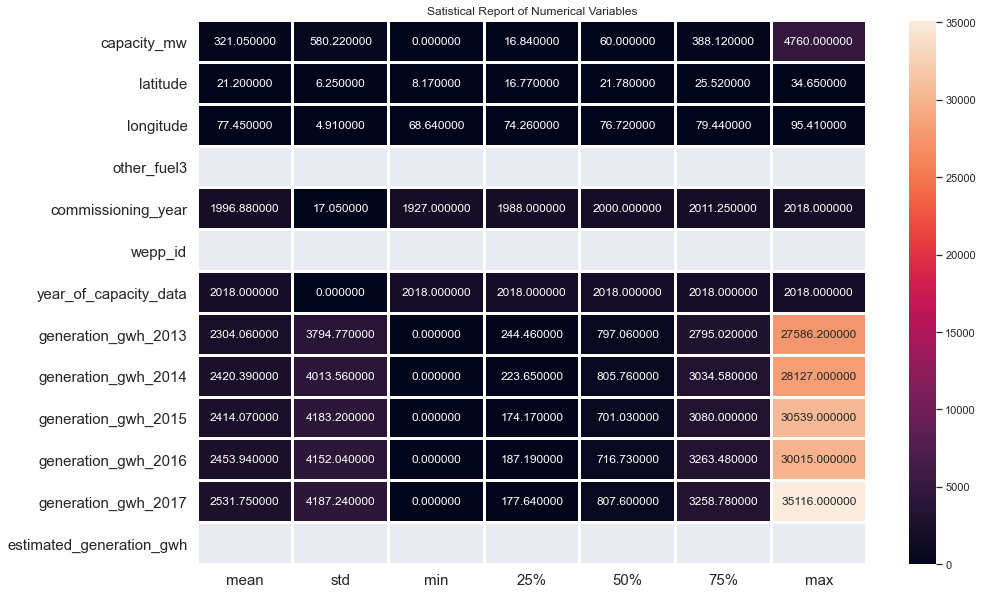

In [6]:
#visualizing statistical description of dataset
plt.figure(figsize = (15,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth = 2,annot= True, fmt = "f")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Satistical Report of Numerical Variables")
plt.show()

- capactiy_mw :
    - mean : 321.05
    - std : 580.22
    - min : 0
    - max : 4760
    
- latitude :
    - mean : 21.2
    - std : 6.25
    - min : 8.17
    - max : 34.65
     
- longitude :
    - mean : 77.45
    - std : 4.91
    - min : 68.64
    - max : 95.41
    
- commissioning_year:
    - mean : 1996.88
    - std : 17.05
    - min : 1927
    - max : 2018
    
- year_of_capacity_data:
    - mean : 2018
    - std :0
    - min : 2018
    - max : 2018
    
- generation_gwh_2013:
    - mean : 2304.06
    - std : 3794.77
    - min : 0
    - max : 27586.2
    
- generation_gwh_2014:
    - mean : 2420.39
    - std : 4013.56
    - min : 0
    - max : 28127
    
- generation_gwh_2015:
    - mean : 2414.07
    - std : 4183.2
    - min : 0
    - max : 30539
    
- generation_gwh_2016:
    - mean : 2531.75
    - std : 4152.24
    - min : 0
    - max : 30015
    
- generation_gwh_2017:
    - mean : 2531.75
    - std : 4187.24
    - min : 0
    - max : 35116

In [7]:
#Checking for Duplicate Values
df.duplicated().sum()

0

In [8]:
#Checking for null Values
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

### Univariate Analysis

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64


Text(0.5, 1.0, 'Primary Fuel Categories')

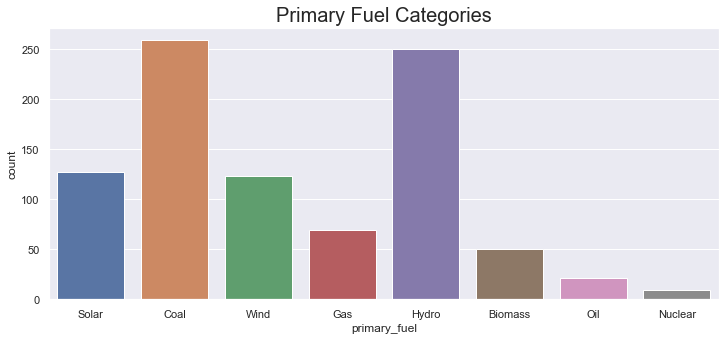

In [9]:
print(df['primary_fuel'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(df['primary_fuel'])
plt.title("Primary Fuel Categories", fontsize = 20)

-  We've 8 types of primary fuels.

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


Text(0.5, 1.0, 'Other Fuel Categories')

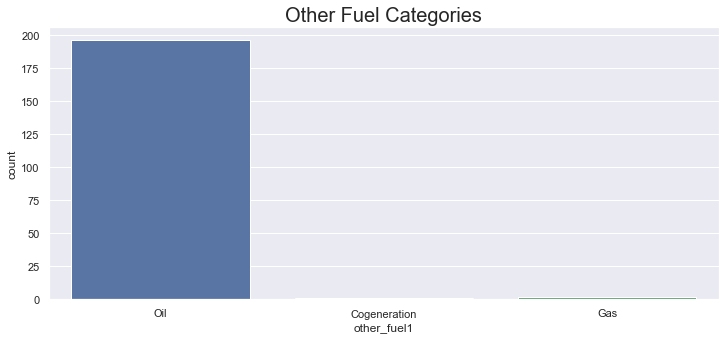

In [10]:
print(df['other_fuel1'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(df['other_fuel1'])
plt.title("Other Fuel Categories", fontsize = 20)

- We've 3 types of Other_fuels. This column seems to be missing more than 70% of data.

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


Text(0.5, 1.0, 'Geolocation Source Categories')

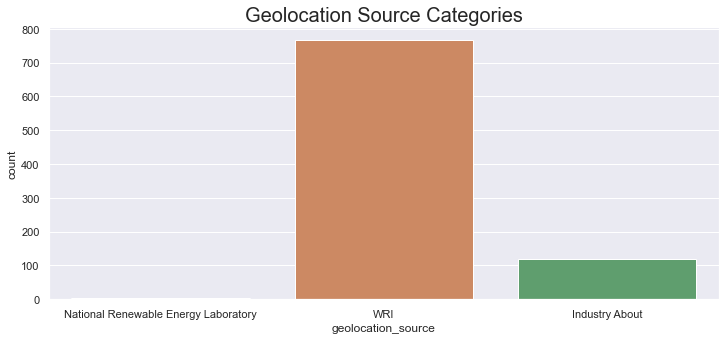

In [11]:
print(df['geolocation_source'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(df['geolocation_source'])
plt.title("Geolocation Source Categories", fontsize = 20)

-  We've 3 geolocation sources for our energy generating power plants.

Text(0.5, 1.0, 'Distribution of capacity_mw')

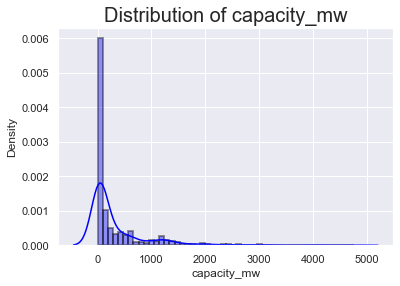

In [12]:
sns.distplot(df['capacity_mw'], color = 'blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of capacity_mw", fontsize = 20)

- We've right-skewed Data. Data distribution needs to be normalised.

Text(0.5, 1.0, 'Distribution of generation_gwh_2013')

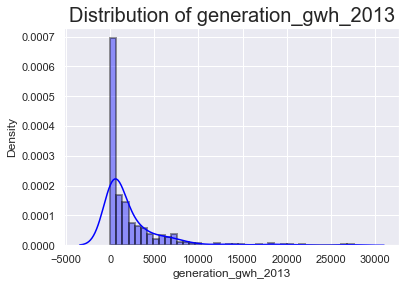

In [13]:
sns.distplot(df['generation_gwh_2013'], color = 'blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of generation_gwh_2013", fontsize = 20)

- We've right-skewed Data. Data distribution needs to be normalised.

Text(0.5, 1.0, 'Distribution of generation_gwh_2014')

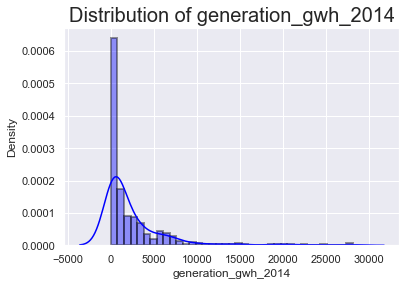

In [14]:
sns.distplot(df['generation_gwh_2014'], color = 'blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of generation_gwh_2014", fontsize = 20)

- We've right-skewed Data. Data distribution needs to be normalised.

Text(0.5, 1.0, 'Distribution of generation_gwh_2015')

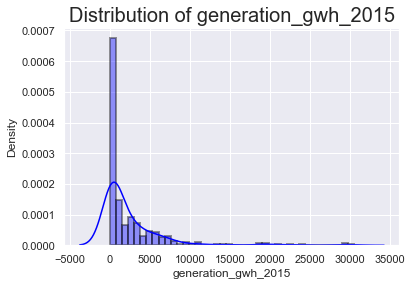

In [15]:
sns.distplot(df['generation_gwh_2015'], color = 'blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of generation_gwh_2015", fontsize = 20)

- We've right-skewed Data. Data distribution needs to be normalised.

Text(0.5, 1.0, 'Distribution of generation_gwh_2016')

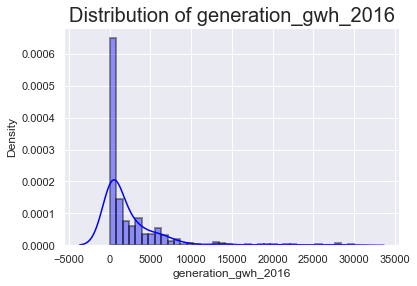

In [16]:
sns.distplot(df['generation_gwh_2016'], color = 'blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of generation_gwh_2016", fontsize = 20)

- We've right-skewed Data. Data distribution needs to be normalised.

Text(0.5, 1.0, 'Distribution of generation_gwh_2017')

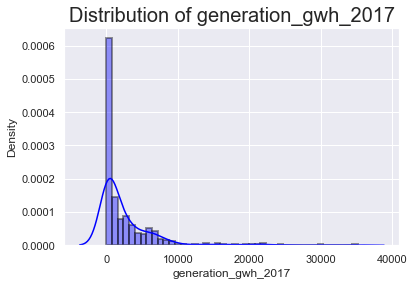

In [17]:
sns.distplot(df['generation_gwh_2017'], color = 'blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of generation_gwh_2017", fontsize = 20)

- We've right-skewed Data. Data distribution needs to be normalised.

### Bivariate Analysis

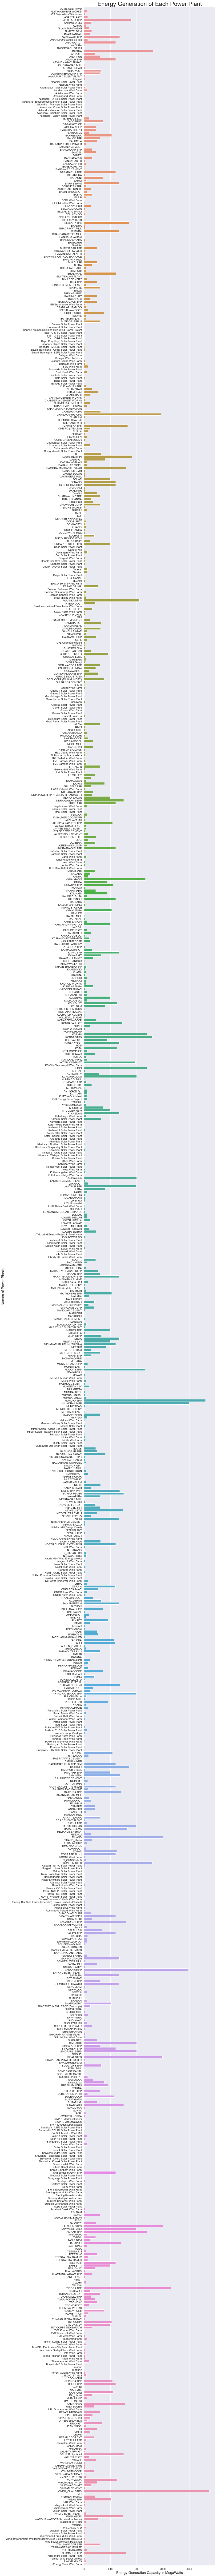

In [18]:
plt.figure(figsize = (10,200))                                 
sns.barplot(data = df, x = 'capacity_mw', y = 'name')
plt.title("Energy Generation of Each Power Plant",fontsize = 25)
plt.ylabel("Names of Power Plants",fontsize = 15)
plt.xlabel("Energy Generation Capacity in MegaWatts" ,fontsize = 15)
plt.show()

- Highest Energy Generation(>4000mW) is by VINDH_CHAL STPS and MUNDRA TPP Power plants.
- Lowest Energy Generation is by Tata BP - Electronics City Solar Panel Plant.	

Text(0.5, 0, 'Primary Fuels')

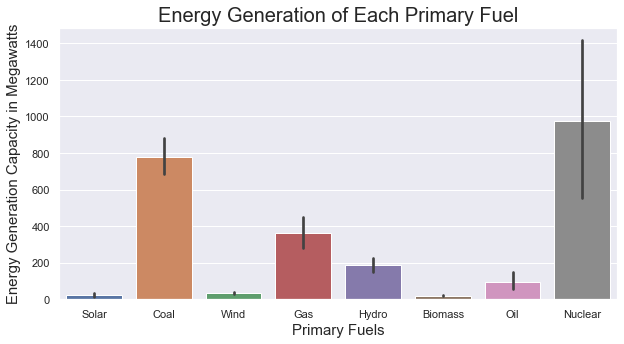

In [19]:
plt.figure(figsize = (10,5))                                 
sns.barplot(data = df, x = 'primary_fuel', y = 'capacity_mw')
plt.title("Energy Generation of Each Primary Fuel",fontsize = 20)
plt.ylabel("Energy Generation Capacity in Megawatts",fontsize = 15)
plt.xlabel("Primary Fuels" ,fontsize = 15)

- Energy Generation is maximum when Nuclear is used a Primary Fuel.

Text(0.5, 0, 'Energy Generation Capacity in Megawatts')

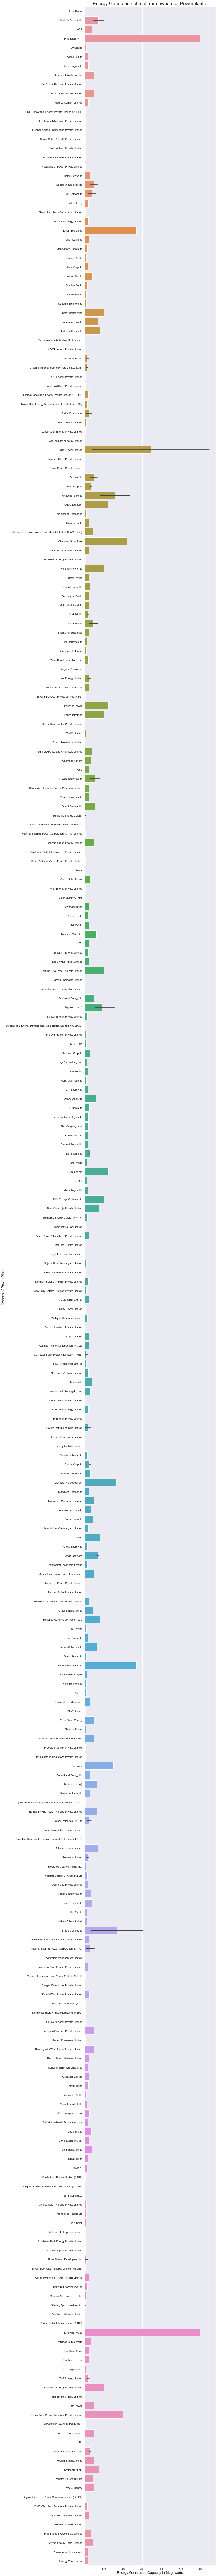

In [20]:
plt.figure(figsize = (10,200))                                 
sns.barplot(data = df, x = 'capacity_mw', y = 'owner')
plt.title("Energy Generation of fuel from owners of Powerplants ",fontsize = 20)
plt.ylabel("Owners of Power Plants",fontsize = 15)
plt.xlabel("Energy Generation Capacity in Megawatts" ,fontsize = 15)

- Hindustan Pvt Ltd and Dhariwal Pvt Ltd generates the highest energy.

Text(0.5, 0, 'Geolocation Source')

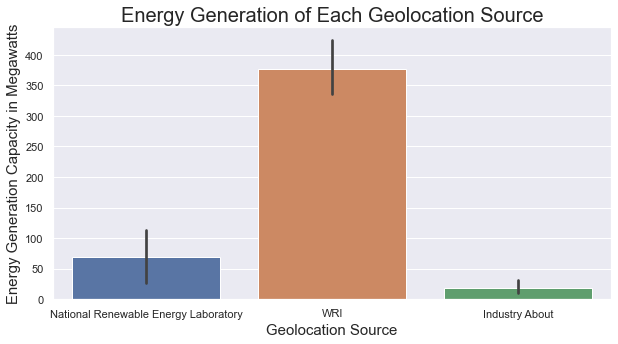

In [21]:
plt.figure(figsize = (10,5))                                 
sns.barplot(data = df, x = 'geolocation_source', y = 'capacity_mw')
plt.title("Energy Generation of Each Geolocation Source",fontsize = 20)
plt.ylabel("Energy Generation Capacity in Megawatts",fontsize = 15)
plt.xlabel("Geolocation Source" ,fontsize = 15)

- WRI Generates maximum amount of Energy.

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='capacity_mw'>

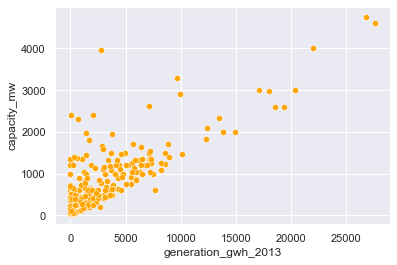

In [22]:
sns.scatterplot(data = df, x = 'generation_gwh_2013', y ='capacity_mw', color = 'orange')

- There's a positive correlation between Capacity_mw and generation_gwh_2014

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

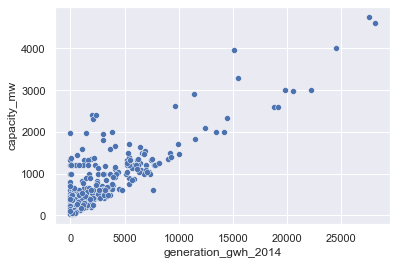

In [23]:
sns.scatterplot(data = df, x = 'generation_gwh_2014', y ='capacity_mw')

- There's a positive correlation between Capacity_mw and generation_gwh_2015

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

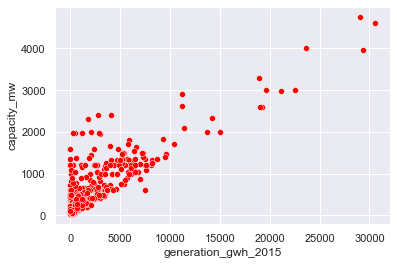

In [24]:
sns.scatterplot(data = df, x = 'generation_gwh_2015', y ='capacity_mw', color = 'red')

- There's a positive correlation between Capacity_mw and generation_gwh_2015

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

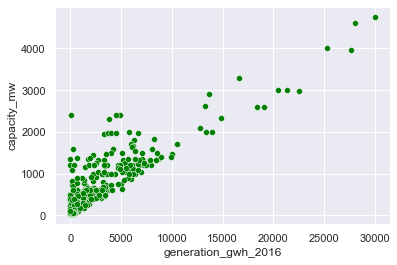

In [25]:
sns.scatterplot(data = df, x = 'generation_gwh_2016', y ='capacity_mw',color = 'green')

- There's a positive correlation between Capacity_mw and generation_gwh_2016

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

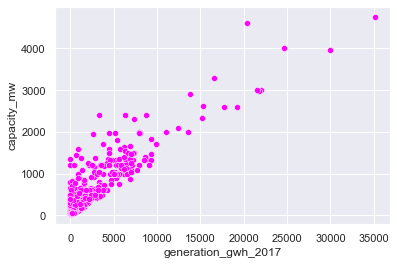

In [26]:
sns.scatterplot(data = df, x = 'generation_gwh_2017', y ='capacity_mw',color ='magenta')

- There's a positive correlation between Capacity_mw and generation_gwh_2017

### Multivariate Analysis

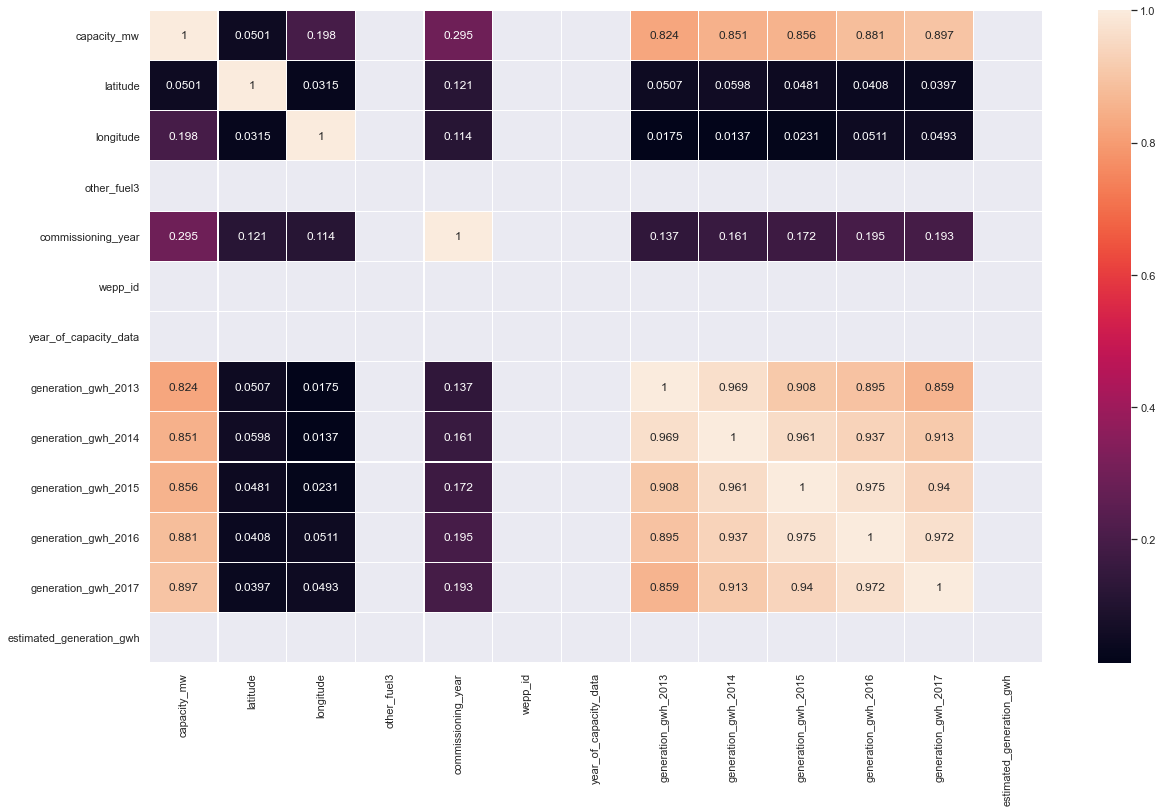

In [27]:
#Visualising correlation table
plt.figure(figsize = [20,12])
sns.heatmap(df.corr(), annot = True,linewidths=0.1,fmt = '.3g' )
plt.show()

- We've many missing values.
- we've positive correlation between generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 and capacity_mw.
- we've positive correlation between generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 withing them.

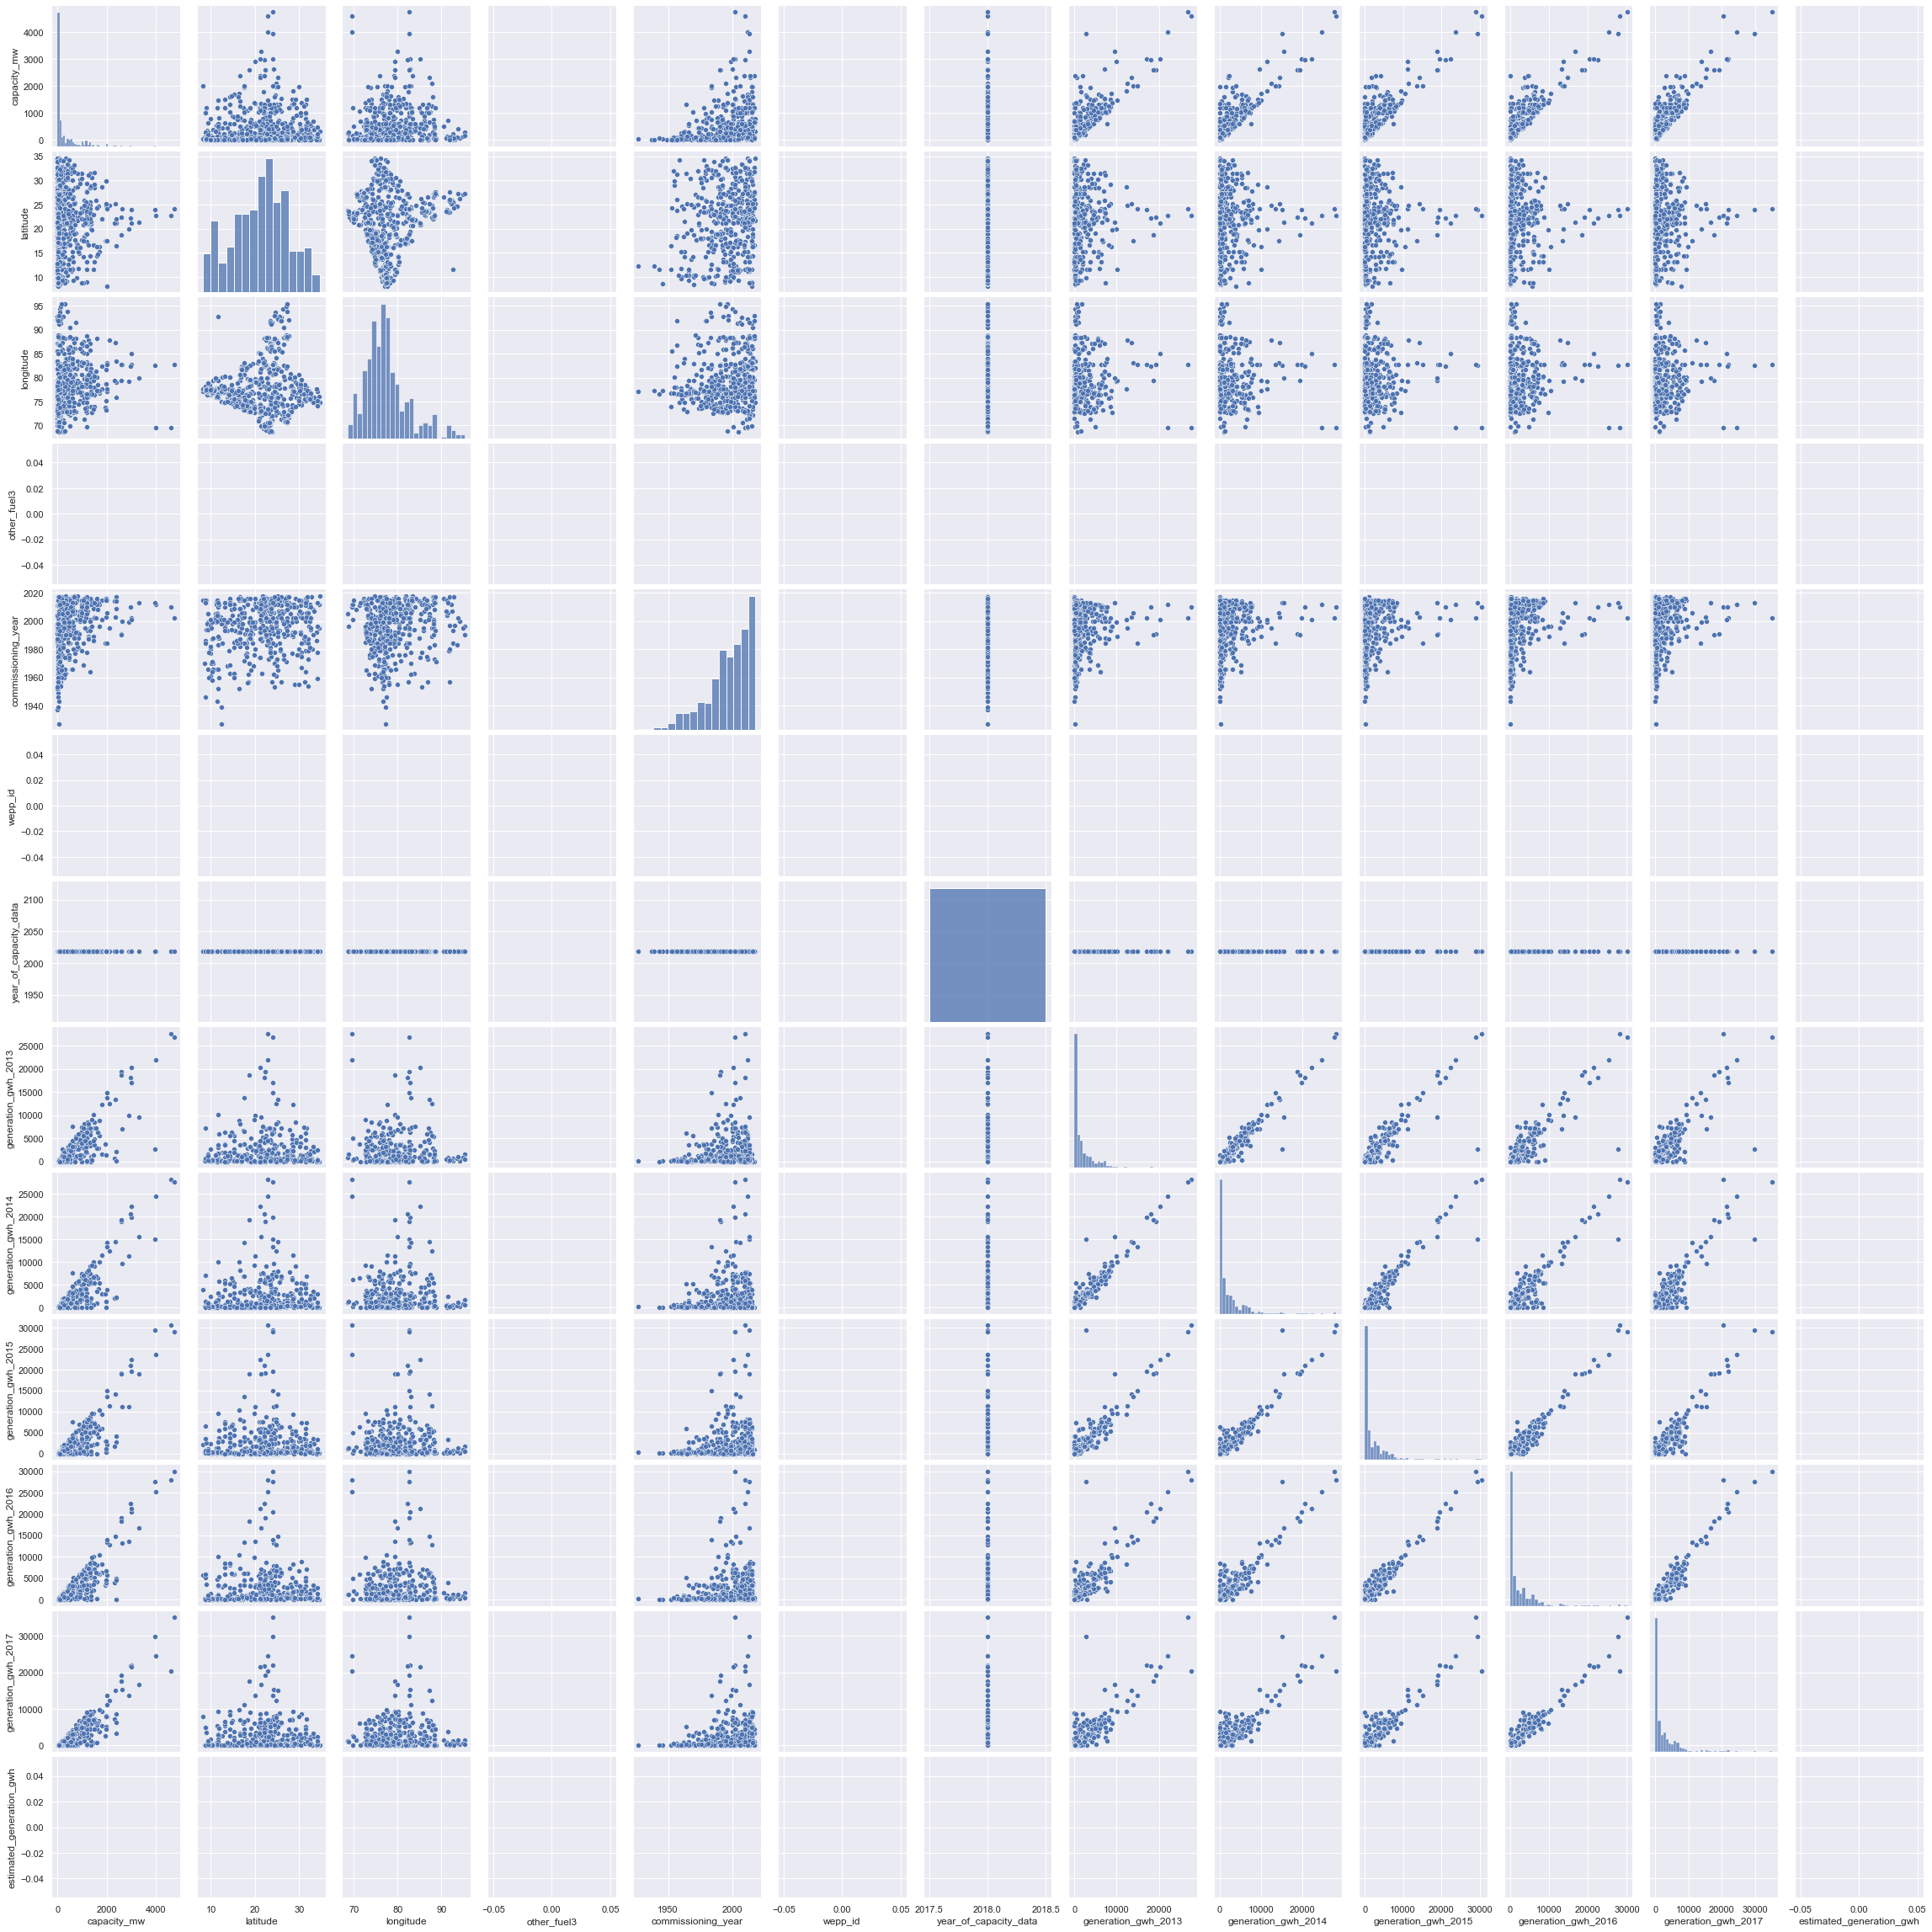

In [28]:
sns.pairplot(df)

- We've many missing values.
- we've positive correlation between generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 and capacity_mw.
- we've positive correlation between generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 withing them.

Text(0.5, 0, 'Energy Generation Capacity in MegaWatts')

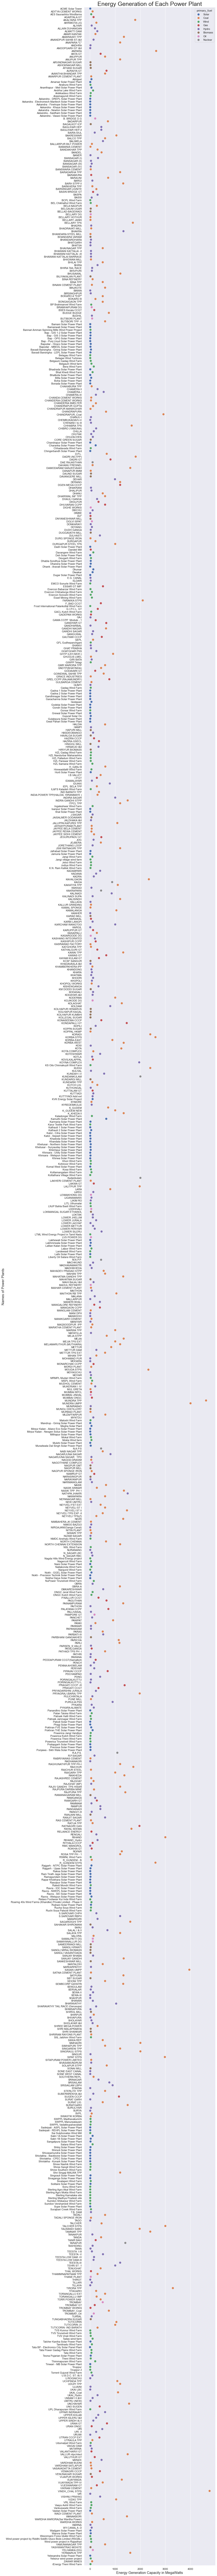

In [29]:
plt.figure(figsize = (10,200))                                 
sns.pointplot(data = df, x = 'capacity_mw', y = 'name', hue = 'primary_fuel', join = False)
plt.title("Energy Generation of Each Power Plant",fontsize = 25)
plt.ylabel("Names of Power Plants",fontsize = 15)
plt.xlabel("Energy Generation Capacity in MegaWatts" ,fontsize = 15)

- Highest Energy Generation(>4000mW) is by VINDH_CHAL STPS and MUNDRA TPP Power plants both use Coal as their Primary fuel.
- Lowest Energy Generation is by Tata BP - Electronics City Solar Panel Plant which uses Solar as their Primary fuel.	

### Data Cleaning

In [30]:
#Dropping columns which do not partakes in determining both type of fuel or capacity_mw generation. 
#We only have India's Power Plants data. So it doesn't make sense to keep a column with one single identical entries.
df.drop(columns = ['country','country_long'], axis =1, inplace =True)
df.head()

name   gppd_idnr  capacity_mw  latitude  longitude  \
0          ACME Solar Tower  WRI1020239          2.5   28.1839    73.2407   
1       ADITYA CEMENT WORKS  WRI1019881         98.0   24.7663    74.6090   
2  AES Saurashtra Windfarms  WRI1026669         39.2   21.9038    69.3732   
3               AGARTALA GT  IND0000001        135.0   23.8712    91.3602   
4              AKALTARA TPP  IND0000002       1800.0   21.9603    82.4091   

  primary_fuel other_fuel1 other_fuel2  other_fuel3  commissioning_year  ...  \
0        Solar         NaN         NaN          NaN              2011.0  ...   
1         Coal         NaN         NaN          NaN                 NaN  ...   
2         Wind         NaN         NaN          NaN                 NaN  ...   
3          Gas         NaN         NaN          NaN              2004.0  ...   
4         Coal         Oil         NaN          NaN              2015.0  ...   

                     geolocation_source wepp_id year_of_capacity_data  \
0  National Renewable Energy Laboratory     NaN                   NaN   
1                                   WRI     NaN                   NaN   
2                                   WRI     NaN                   NaN   
3                                   WRI     NaN                2018.0   
4                                   WRI     NaN                2018.0   

  generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                 NaN                  NaN                  NaN   
1                 NaN                  NaN                  NaN   
2                 NaN                  NaN                  NaN   
3          631.777928           617.789264              843.747   
4         1668.290000          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           886.004428           663.774500  Central Electricity Authority   
4          6243.000000          5385.579736  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 23 columns]

In [31]:
#Dropping nominal data
df.drop(columns = ['name','gppd_idnr','url'],inplace = True)

In [32]:
#Checking for null Values to treat them
print("\nMissing values in percentage: \n",df.isnull().sum()/df.shape[0]*100)
#show values in percentage


Missing values in percentage: 
 capacity_mw                   0.000000
latitude                      5.066079
longitude                     5.066079
primary_fuel                  0.000000
other_fuel1                  78.083700
other_fuel2                  99.889868
other_fuel3                 100.000000
commissioning_year           41.850220
owner                        62.334802
source                        0.000000
geolocation_source            2.092511
wepp_id                     100.000000
year_of_capacity_data        42.731278
generation_gwh_2013          57.709251
generation_gwh_2014          55.837004
generation_gwh_2015          53.193833
generation_gwh_2016          51.872247
generation_gwh_2017          51.211454
generation_data_source       50.440529
estimated_generation_gwh    100.000000
dtype: float64


<AxesSubplot:>

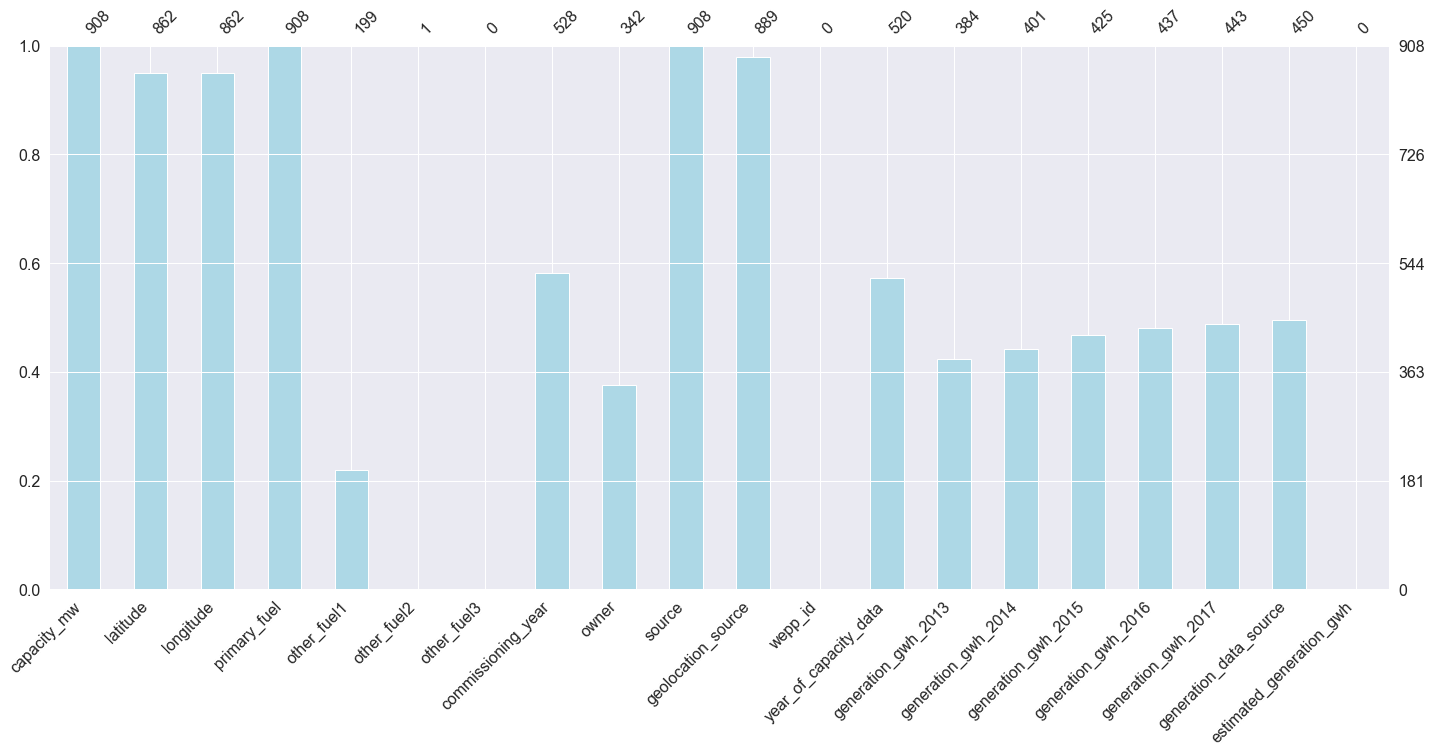

In [33]:
#Visualising missing Values
#Multivariate analysis
msno.bar(df,color = 'lightblue')

In [34]:
#Dropping columns with more than 75% data missing.
df.drop(columns = ['other_fuel1','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'], axis =1, inplace =True)
df.head()

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   
1         98.0   24.7663    74.6090         Coal                 NaN   
2         39.2   21.9038    69.3732         Wind                 NaN   
3        135.0   23.8712    91.3602          Gas              2004.0   
4       1800.0   21.9603    82.4091         Coal              2015.0   

                  owner                                source  \
0           Solar Paces  National Renewable Energy Laboratory   
1  Ultratech Cement ltd                  Ultratech Cement ltd   
2                   AES                                   CDM   
3                   NaN         Central Electricity Authority   
4                   NaN         Central Electricity Authority   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                    NaN   
1                                   WRI                    NaN   
2                                   WRI                    NaN   
3                                   WRI                 2018.0   
4                                   WRI                 2018.0   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           631.777928           617.789264              843.747   
4          1668.290000          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  
0                  NaN                  NaN                            NaN  
1                  NaN                  NaN                            NaN  
2                  NaN                  NaN                            NaN  
3           886.004428           663.774500  Central Electricity Authority  
4          6243.000000          5385.579736  Central Electricity Authority

#### Imputing of missing values in generation_gwh columns using KNN Imputer

In [35]:
#Making a new dataset and copying data of generation_gwh_year columns 

data = {'generation_gwh_2013': df['generation_gwh_2013'],
       'generation_gwh_2014':df['generation_gwh_2014'],
       'generation_gwh_2015':df['generation_gwh_2015'],
       'generation_gwh_2016':df['generation_gwh_2016'],
       'generation_gwh_2017':df['generation_gwh_2017']}

In [36]:
#Joining of new Dataframe along columns
df1 = pd.concat(data,axis =1)
df1

generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3             631.777928           617.789264           843.747000   
4            1668.290000          3035.550000          5916.370000   
..                   ...                  ...                  ...   
903                  NaN                  NaN             0.994875   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   
907                  NaN                  NaN                  NaN   

     generation_gwh_2016  generation_gwh_2017  
0                    NaN                  NaN  
1                    NaN                  NaN  
2                    NaN                  NaN  
3             886.004428           663.774500  
4            6243.000000          5385.579736  
..                   ...                  ...  
903           233.596650           865.400000  
904                  NaN                  NaN  
905                  NaN                  NaN  
906                  NaN                  NaN  
907                  NaN                  NaN  

[908 rows x 5 columns]

In [37]:
#Instantiating knn imputer with neighbors = 2 and imputing our new dataframe.
imputer = KNNImputer(n_neighbors = 2)
df2 = pd.DataFrame(imputer.fit_transform(df1))

In [38]:
df2.rename(columns = {0: 'generation_2013',1:'generation_2014',2:'generation_2015',3:'generation_2016',4:'generation_2017'}, inplace = True)

In [39]:
# checking null values after imputation.
df2.isna().sum()

generation_2013    0
generation_2014    0
generation_2015    0
generation_2016    0
generation_2017    0
dtype: int64

In [40]:
#Concatenating imputed dataframe with our original Dataframe
frames = [df,df2]
df = pd.concat(frames,axis =1)

In [41]:
#Dropping columns with missing values
df.drop(columns=['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'], axis = 1,inplace = True)

#### Imputing Latitude and Longitude using Iterative Imputer

In [42]:
#Instantiating Iterative Imputer and Imputing missing values in latitude and longitude
iter_impute = IterativeImputer()
df3= pd.DataFrame(iter_impute.fit_transform(df[['latitude','longitude']]))

In [43]:
#renaming colums
df3.rename(columns = {0 : 'Latitude',1: 'Longitude'},inplace = True)

In [44]:
frames = [df,df3]

In [45]:
#Concatenating new imputed dataframe with original dataset
df = pd.concat(frames,axis=1)
df

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0            2.5   28.1839    73.2407        Solar              2011.0   
1           98.0   24.7663    74.6090         Coal                 NaN   
2           39.2   21.9038    69.3732         Wind                 NaN   
3          135.0   23.8712    91.3602          Gas              2004.0   
4         1800.0   21.9603    82.4091         Coal              2015.0   
..           ...       ...        ...          ...                 ...   
903       1600.0   16.2949    77.3568         Coal              2016.0   
904          3.0   12.8932    78.1654        Solar                 NaN   
905         25.5   15.2758    75.5811         Wind                 NaN   
906         80.0   24.3500    73.7477         Coal                 NaN   
907         16.5    9.9344    77.4768         Wind                 NaN   

                                   owner  \
0                            Solar Paces   
1                   Ultratech Cement ltd   
2                                    AES   
3                                    NaN   
4                                    NaN   
..                                   ...   
903                                  NaN   
904  Karnataka Power Corporation Limited   
905                                  NaN   
906                   Hindustan Zinc ltd   
907                   iEnergy Wind Farms   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
903         Central Electricity Authority   
904   Karnataka Power Corporation Limited   
905                                   CDM   
906                    Hindustan Zinc ltd   
907                                   CDM   

                       geolocation_source  year_of_capacity_data  \
0    National Renewable Energy Laboratory                    NaN   
1                                     WRI                    NaN   
2                                     WRI                    NaN   
3                                     WRI                 2018.0   
4                                     WRI                 2018.0   
..                                    ...                    ...   
903                                   WRI                 2018.0   
904                        Industry About                    NaN   
905                                   WRI                    NaN   
906                                   WRI                    NaN   
907                                   WRI                    NaN   

            generation_data_source  generation_2013  generation_2014  \
0                              NaN      2304.059202      2420.393316   
1                              NaN      2304.059202      2420.393316   
2                              NaN      2304.059202      2420.393316   
3    Central Electricity Authority       631.777928       617.789264   
4    Central Electricity Authority      1668.290000      3035.550000   
..                             ...              ...              ...   
903  Central Electricity Authority       290.345000       121.817000   
904                            NaN      2304.059202      2420.393316   
905                            NaN      2304.059202      2420.393316   
906                            NaN      2304.059202      2420.393316   
907                            NaN      2304.059202      2420.393316   

     generation_2015  generation_2016  generation_2017  Latitude  Longitude  
0        2414.072373      2453.936292      2531.754458   28.1839    73.2407  
1        2414.072373      2453.936292      2531.754458   24.7663    74.6090  
2        2414.072373      2453.936292      2531.754458   21.9038    69.3732  
3         843.747000       886.004428       663.7745

In [46]:
#Dropping columns with missing values
df.drop(columns = ['latitude','longitude'],inplace = True)

#### Imputing geolocation_source with mode

In [47]:
#checking mode of geolocation source
df['geolocation_source'].mode()

0    WRI
dtype: object

In [48]:
#filling na with mode
df['geolocation_source'].fillna("WRI",inplace = True)

#### Filling missing values of "owner" with 'unknown' because we've 3 modes for this column.

In [49]:
df['owner'].fillna("unknown",inplace = True)

#### Filling missing values of commissioning_year with median

In [50]:
#Checking median
df['commissioning_year'].median()

2000.0

In [51]:
df['commissioning_year'].fillna(2000,inplace = True)

#### we only have one year_of_capacity_data i.e. (2018). so we can fill the missing values with 0 and encode 2018 as 1.

In [52]:
#filling na with 0
df['year_of_capacity_data'].fillna(0,inplace = True)

In [53]:
#replacing 2018 with 1
df['year_of_capacity_data'].replace(2018,1,inplace = True)

- Now we have two categories :
     - 1 : year_of_capacity_data = 2018
     - 0 : year_of_capacity_data != 2018

#### Similarly we only have one generation_data_source(Central Electric Authority). We can replace missing values with 0 and encode  Central Electric Authority with 1. 

In [54]:
df['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [55]:
df['generation_data_source'].fillna(0,inplace = True)

In [56]:
df['generation_data_source'].replace('Central Electricity Authority',1,inplace = True)

- Now we have two categories :
     - 1 : generation_data_source = Central Electricity Authority
     - 0 : generation_data_source != Central Electricity Authority

In [57]:
df.isna().sum()

capacity_mw               0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_data_source    0
generation_2013           0
generation_2014           0
generation_2015           0
generation_2016           0
generation_2017           0
Latitude                  0
Longitude                 0
dtype: int64

#### Encoding our categorical features using ordinal encoder

In [58]:
ord_enc = OrdinalEncoder()
X1 = pd.DataFrame(ord_enc.fit_transform(df[['owner','primary_fuel','source','geolocation_source']]),
                  columns = ['owner','primary_fuel','source','geolocation_source'])
X1

owner  primary_fuel  source  geolocation_source
0    229.0           6.0   109.0                 1.0
1    258.0           1.0   174.0                 2.0
2      2.0           7.0    21.0                 2.0
3    280.0           2.0    22.0                 2.0
4    280.0           1.0    22.0                 2.0
..     ...           ...     ...                 ...
903  280.0           1.0    22.0                 2.0
904  114.0           6.0    77.0                 0.0
905  280.0           7.0    21.0                 2.0
906   91.0           1.0    59.0                 2.0
907  279.0           7.0    21.0                 2.0

[908 rows x 4 columns]

In [59]:
df.drop(columns = ['owner','primary_fuel','source','geolocation_source'], inplace = True)

In [60]:
frames = [df,X1]
df = pd.concat(frames,axis = 1)

In [61]:
df

capacity_mw  commissioning_year  year_of_capacity_data  \
0            2.5              2011.0                    0.0   
1           98.0              2000.0                    0.0   
2           39.2              2000.0                    0.0   
3          135.0              2004.0                    1.0   
4         1800.0              2015.0                    1.0   
..           ...                 ...                    ...   
903       1600.0              2016.0                    1.0   
904          3.0              2000.0                    0.0   
905         25.5              2000.0                    0.0   
906         80.0              2000.0                    0.0   
907         16.5              2000.0                    0.0   

     generation_data_source  generation_2013  generation_2014  \
0                         0      2304.059202      2420.393316   
1                         0      2304.059202      2420.393316   
2                         0      2304.059202      2420.393316   
3                         1       631.777928       617.789264   
4                         1      1668.290000      3035.550000   
..                      ...              ...              ...   
903                       1       290.345000       121.817000   
904                       0      2304.059202      2420.393316   
905                       0      2304.059202      2420.393316   
906                       0      2304.059202      2420.393316   
907                       0      2304.059202      2420.393316   

     generation_2015  generation_2016  generation_2017  Latitude  Longitude  \
0        2414.072373      2453.936292      2531.754458   28.1839    73.2407   
1        2414.072373      2453.936292      2531.754458   24.7663    74.6090   
2        2414.072373      2453.936292      2531.754458   21.9038    69.3732   
3         843.747000       886.004428       663.774500   23.8712    91.3602   
4        5916.370000      6243.000000      5385.579736   21.9603    82.4091   
..               ...              ...              ...       ...        ...   
903         0.994875       233.596650       865.400000   16.2949    77.3568   
904      2414.072373      2453.936292      2531.754458   12.8932    78.1654   
905      2414.072373      2453.936292      2531.754458   15.2758    75.5811   
906      2414.072373      2453.936292      2531.754458   24.3500    73.7477   
907      2414.072373      2453.936292      2531.754458    9.9344    77.4768   

     owner  primary_fuel  source  geolocation_source  
0    229.0           6.0   109.0                 1.0  
1    258.0           1.0   174.0                 2.0  
2      2.0           7.0    21.0                 2.0  
3    280.0           2.0    22.0                 2.0  
4    280.0           1.0    22.0                 2.0  
..     ...           ...     ...                 ...  
903  280.0           1.0    22.0                 2.0  
904  114.0           6.0    77.0                 0.0  
905  280.0           7.0    21.0                 2.0  
906   91.0           1.0    59.0                 2.0  
907  279.0           7.0    21.0                 2.0  

[908 rows x 15 columns]

#### Analysing Data Skewness

In [62]:
df.skew()

capacity_mw               3.193257
commissioning_year       -1.650230
year_of_capacity_data    -0.294357
generation_data_source    0.017651
generation_2013           5.090952
generation_2014           4.899068
generation_2015           5.264811
generation_2016           5.034188
generation_2017           5.083705
Latitude                 -0.147391
Longitude                 1.129836
owner                    -1.375607
primary_fuel              0.471141
source                    1.829145
geolocation_source       -2.161710
dtype: float64

__Removing Skewness for our Numerical Columns__

<AxesSubplot:xlabel='capacity_mw'>

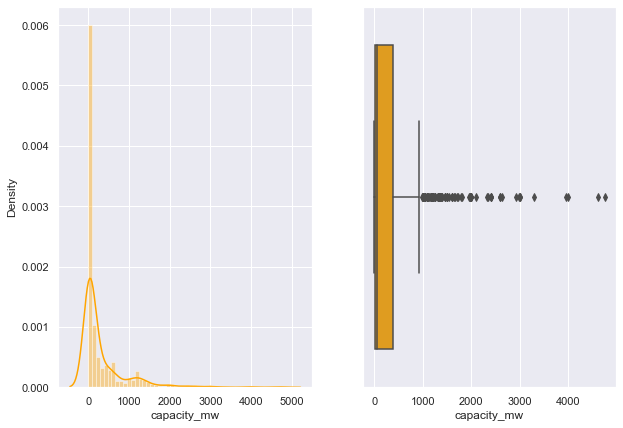

In [63]:
#Visualising outlier and skewness using boxplot and distribution plot

fig , ax = plt.subplots(1,2, figsize = (10,7))
sns.distplot(df['capacity_mw'],color ='orange',ax = ax[0])
sns.boxplot(df['capacity_mw'],color ='orange', ax = ax[1])

#we've rightly skewed data

In [64]:
#Removing skewness using cuberoot transformation
df['capacity_mw'] = np.cbrt(df['capacity_mw'])

<AxesSubplot:xlabel='capacity_mw'>

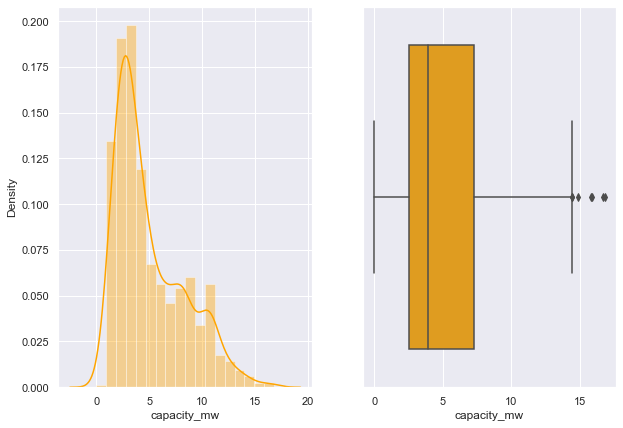

In [65]:
#Visualising outlier and skewness using boxplot and distribution plot after skewness removal

fig , ax = plt.subplots(1,2, figsize = (10,7))
sns.distplot(df['capacity_mw'],color ='orange',ax = ax[0])
sns.boxplot(df['capacity_mw'],color ='orange', ax = ax[1])


<AxesSubplot:xlabel='generation_2013'>

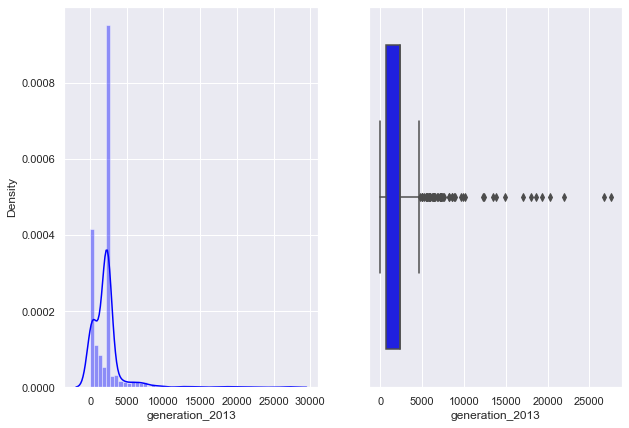

In [66]:
#Visualising outlier and skewness using boxplot and distribution plot

fig , ax = plt.subplots(1,2, figsize = (10,7))
sns.distplot(df['generation_2013'],color ='blue',ax = ax[0])
sns.boxplot(df['generation_2013'],color ='blue', ax = ax[1])

#we've rightly skewed data

In [67]:
#Removing skewness using cuberoot transformation

df['generation_2013'] = np.cbrt(df['generation_2013'])

<AxesSubplot:xlabel='generation_2013'>

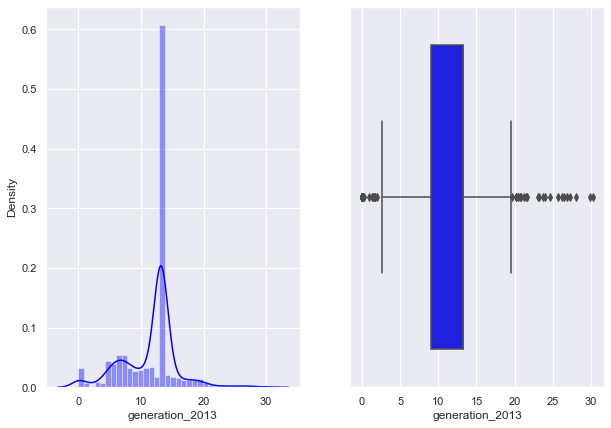

In [68]:
#Visualising outlier and skewness using boxplot and distribution plot after removing skewness

fig , ax = plt.subplots(1,2, figsize = (10,7))
sns.distplot(df['generation_2013'],color ='blue',ax = ax[0])
sns.boxplot(df['generation_2013'],color ='blue', ax = ax[1])

#we've rightly skewed data

<AxesSubplot:xlabel='generation_2014'>

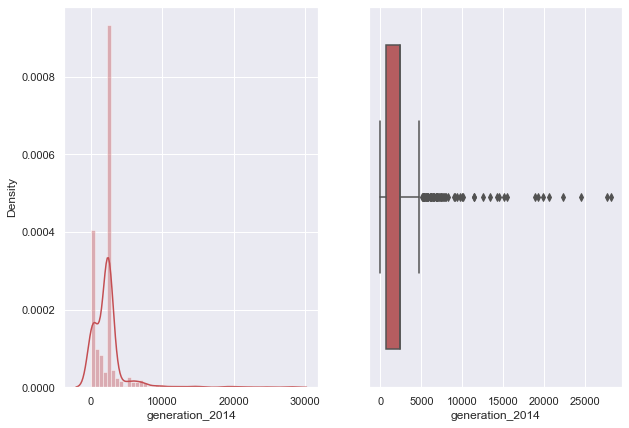

In [69]:
#Visualising outlier and skewness using boxplot and distribution plot

fig , ax = plt.subplots(1,2, figsize = (10,7))
sns.distplot(df['generation_2014'],color ='r',ax = ax[0])
sns.boxplot(df['generation_2014'],color ='r', ax = ax[1])

#we've rightly skewed data

In [70]:
#Removing skewness using cuberoot transformation

df['generation_2014'] = np.cbrt(df['generation_2014'])

<AxesSubplot:xlabel='generation_2014'>

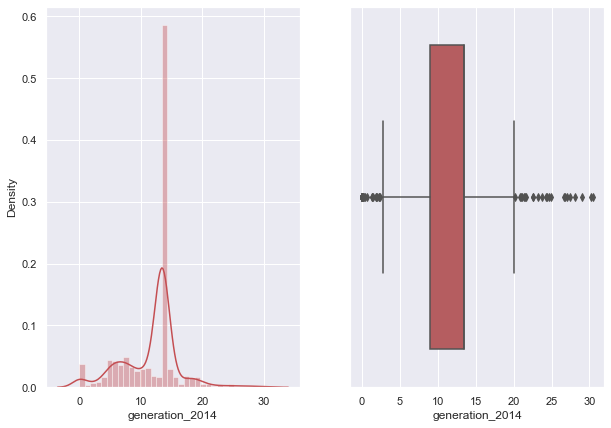

In [71]:
#Visualising outlier and skewness using boxplot and distribution plot after removing skewness

fig , ax = plt.subplots(1,2, figsize = (10,7))
sns.distplot(df['generation_2014'],color ='r',ax = ax[0])
sns.boxplot(df['generation_2014'],color ='r', ax = ax[1])

#we've rightly skewed data

<AxesSubplot:xlabel='generation_2015'>

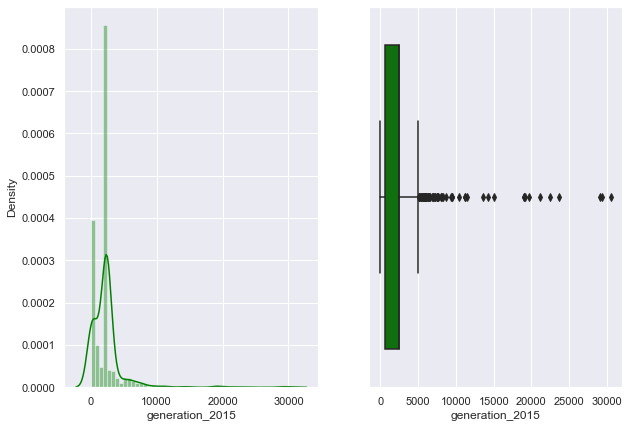

In [72]:
#Visualising outlier and skewness using boxplot and distribution plot

fig , ax = plt.subplots(1,2, figsize = (10,7))
sns.distplot(df['generation_2015'],color ='green',ax = ax[0])
sns.boxplot(df['generation_2015'],color ='green', ax = ax[1])

#we've rightly skewed data

In [73]:
#Removing skewness using cuberoot transformation

df['generation_2015'] = np.cbrt(df['generation_2015'])
df['generation_2013'].skew()

-0.20366733732480094

<AxesSubplot:xlabel='generation_2015'>

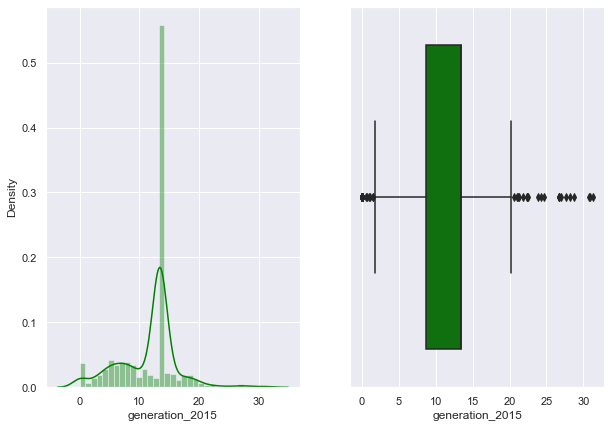

In [74]:
#Visualising outlier and skewness using boxplot and distribution plot after removing skewness

fig , ax = plt.subplots(1,2, figsize = (10,7))
sns.distplot(df['generation_2015'],color ='green',ax = ax[0])
sns.boxplot(df['generation_2015'],color ='green', ax = ax[1])

#we've rightly skewed data

<AxesSubplot:xlabel='generation_2016'>

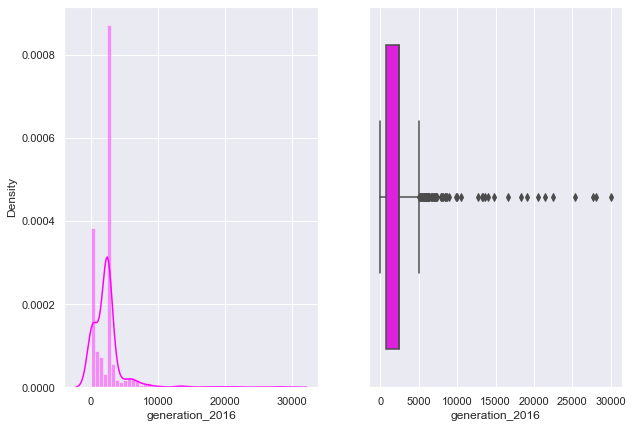

In [75]:
#Visualising outlier and skewness using boxplot and distribution plot

fig , ax = plt.subplots(1,2, figsize = (10,7))
sns.distplot(df['generation_2016'],color ='magenta',ax = ax[0])
sns.boxplot(df['generation_2016'],color ='magenta', ax = ax[1])

#we've rightly skewed data

In [76]:
#Removing skewness using cuberoot transformation

df['generation_2016'] = np.cbrt(df['generation_2016'])
df['generation_2013'].skew()

-0.20366733732480094

<AxesSubplot:xlabel='generation_2016'>

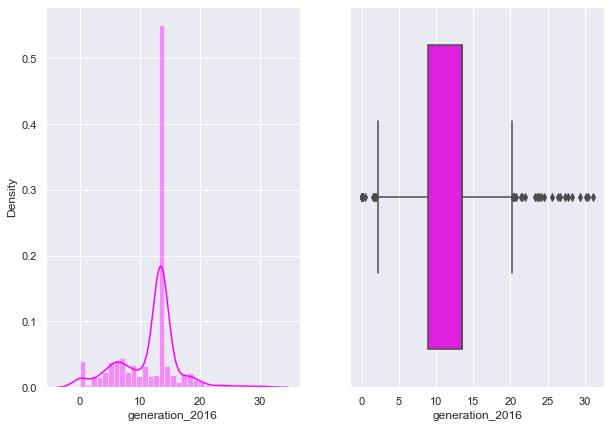

In [77]:
#Visualising outlier and skewness using boxplot and distribution plot after removing skewness

fig , ax = plt.subplots(1,2, figsize = (10,7))
sns.distplot(df['generation_2016'],color ='magenta',ax = ax[0])
sns.boxplot(df['generation_2016'],color ='magenta', ax = ax[1])

#we've rightly skewed data

<AxesSubplot:xlabel='generation_2017'>

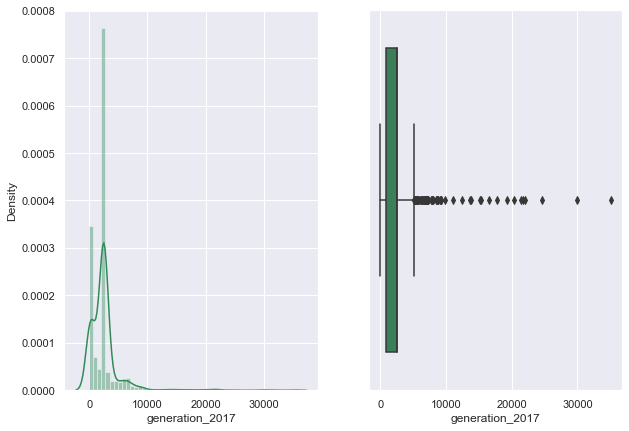

In [78]:
#Visualising outlier and skewness using boxplot and distribution plot

fig , ax = plt.subplots(1,2, figsize = (10,7))
sns.distplot(df['generation_2017'],color ='seagreen',ax = ax[0])
sns.boxplot(df['generation_2017'],color ='seagreen', ax = ax[1])

#we've rightly skewed data

In [79]:
#Removing skewness using cuberoot transformation

df['generation_2017'] = np.cbrt(df['generation_2017'])
df['generation_2017'].skew()

-0.32868235604784785

<AxesSubplot:xlabel='generation_2017'>

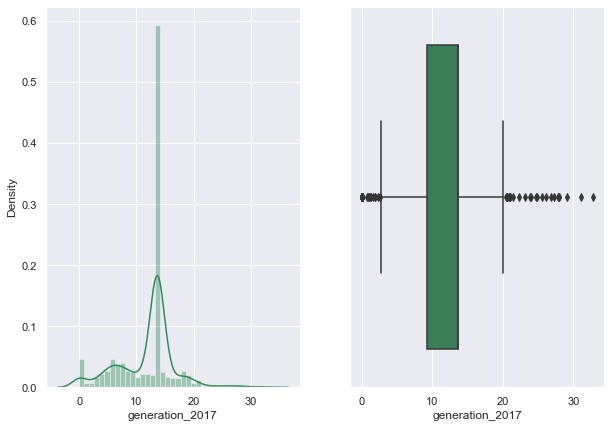

In [80]:
#Visualising outlier and skewness using boxplot and distribution plot after removing skewness

fig , ax = plt.subplots(1,2, figsize = (10,7))
sns.distplot(df['generation_2017'],color ='seagreen',ax = ax[0])
sns.boxplot(df['generation_2017'],color ='seagreen', ax = ax[1])

#we've rightly skewed data

# Classification Models for prediction of Primary Fuel.

#### Importing Classification model Libraries

In [81]:
#Importing Classification Models 

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

#Importing Classification Model Evaluation Metrics 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

#Importing Hyperparameter Tuning model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [82]:
#Splitting datase into features and label
X = df.drop('primary_fuel',axis =1)
y = df['primary_fuel']

### Logistic Regression

In [83]:
#Finding Random state using LogisticRegression
maxAccu=0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on random_state",maxRS)

Best accuracy is 0.6227106227106227 on random_state 70


In [84]:
# Performing Evaluation metrics for our model
predlr = LR.predict(x_test)
print('Accuracy Score for Logistic Regression is :',round(accuracy_score(y_test,predlr),4)*100,'% \n')
print('Confusion Matrix of Logistic Regression: \n',confusion_matrix(y_test,predlr), '\n')
print('Classification Logistic Regression: \n',classification_report(y_test,predlr))

Accuracy Score for Logistic Regression is : 52.75 % 

Confusion Matrix of Logistic Regression: 
 [[ 2  0  0  0  0  0 12  1]
 [ 0 34  0 18  0  0 22  1]
 [ 1  4  0 13  0  0  2  0]
 [ 0  1  0 73  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  2  0]
 [ 0  5  0  0  0  0 28  3]
 [ 0 16  0 17  0  0  1  7]] 

Classification Logistic Regression: 
               precision    recall  f1-score   support

         0.0       0.67      0.13      0.22        15
         1.0       0.55      0.45      0.50        75
         2.0       0.00      0.00      0.00        20
         3.0       0.57      0.99      0.72        74
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00        10
         6.0       0.42      0.78      0.54        36
         7.0       0.58      0.17      0.26        41

    accuracy                           0.53       273
   macro avg       0.35      0.32      0.28       273
weighted avg       0.48      0.53      0.45       

### Decision Tree Classifier

In [85]:
#Splitting Dataset into Training(75%) and testing(25%) data.
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size = 0.25)

In [86]:
#Instantiating Decision Tree model and training it
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [87]:
# Performing Evaluation metrics for our model
preddt=DT.predict(X_test)
print('Accuracy Score for Decision Treee is :',round(accuracy_score(y_test,preddt),4)*100,'% \n')
print('Confusion Matrix of Decision Tree: \n',confusion_matrix(y_test,preddt), '\n')
print('Classification Decision Tree: \n',classification_report(y_test,preddt))

Accuracy Score for Decision Treee is : 77.97 % 

Confusion Matrix of Decision Tree: 
 [[ 7  5  0  0  0  0  0  0]
 [ 2 50  7  6  0  0  0  0]
 [ 0  4 10  3  0  0  0  0]
 [ 0  9  5 46  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  2  3  1  0  0  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 33]] 

Classification Decision Tree: 
               precision    recall  f1-score   support

         0.0       0.78      0.58      0.67        12
         1.0       0.68      0.77      0.72        65
         2.0       0.40      0.59      0.48        17
         3.0       0.82      0.77      0.79        60
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         6
         6.0       1.00      1.00      1.00        31
         7.0       1.00      1.00      1.00        33

    accuracy                           0.78       227
   macro avg       0.59      0.59      0.58       227
weighted avg       0.77      0.78      0.77       227



array([[ 7,  5,  0,  0,  0,  0,  0,  0],
       [ 2, 50,  7,  6,  0,  0,  0,  0],
       [ 0,  4, 10,  3,  0,  0,  0,  0],
       [ 0,  9,  5, 46,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  3,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33]], dtype=int64)

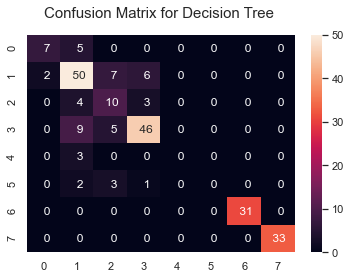

In [88]:
cm = confusion_matrix(y_test,preddt)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,preddt),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Decision Tree ', y=1.05, size=15)
cm

### K Neighbors Classifier

In [89]:
#Instantiating KnN model and training it
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [90]:
# Performing Evaluation metrics for our model
knnpred=knn.predict(X_test)
print('Accuracy Score for KNN is :',round(accuracy_score(y_test,knnpred),4)*100,'% \n')
print('Confusion Matrix of KNN: \n',confusion_matrix(y_test,knnpred), '\n')
print('Classification KNN: \n',classification_report(y_test,knnpred))

Accuracy Score for KNN is : 70.04 % 

Confusion Matrix of KNN: 
 [[ 5  4  1  0  0  0  2  0]
 [ 3 46  3  5  0  0  6  2]
 [ 3  3  6  4  0  1  0  0]
 [ 0  7  1 50  0  0  0  2]
 [ 0  3  0  0  0  0  0  0]
 [ 0  2  2  1  0  0  1  0]
 [ 1  7  1  0  0  0 19  3]
 [ 0  0  0  0  0  0  0 33]] 

Classification KNN: 
               precision    recall  f1-score   support

         0.0       0.42      0.42      0.42        12
         1.0       0.64      0.71      0.67        65
         2.0       0.43      0.35      0.39        17
         3.0       0.83      0.83      0.83        60
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         6
         6.0       0.68      0.61      0.64        31
         7.0       0.82      1.00      0.90        33

    accuracy                           0.70       227
   macro avg       0.48      0.49      0.48       227
weighted avg       0.67      0.70      0.68       227



array([[ 5,  4,  1,  0,  0,  0,  2,  0],
       [ 3, 46,  3,  5,  0,  0,  6,  2],
       [ 3,  3,  6,  4,  0,  1,  0,  0],
       [ 0,  7,  1, 50,  0,  0,  0,  2],
       [ 0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  2,  1,  0,  0,  1,  0],
       [ 1,  7,  1,  0,  0,  0, 19,  3],
       [ 0,  0,  0,  0,  0,  0,  0, 33]], dtype=int64)

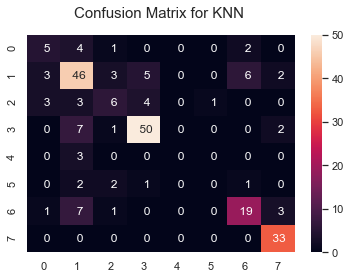

In [91]:
cm = confusion_matrix(y_test,knnpred)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,knnpred),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for KNN ', y=1.05, size=15)
cm

### Random Forest Classifier

In [92]:
#Model instantiating and training it
RF = RandomForestClassifier()
RF.fit(X_train,y_train)


RandomForestClassifier()

In [93]:
# Performing Evaluation metrics for our model
predrf=RF.predict(X_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predrf),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predrf), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predrf))

Accuracy Score for Random Forest Classifier is : 82.82000000000001 % 

Confusion Matrix of Random Forest Classifier : 
 [[ 9  3  0  0  0  0  0  0]
 [ 3 56  1  4  0  0  0  1]
 [ 0  4  9  3  0  1  0  0]
 [ 0 10  0 50  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  2  2  2  0  0  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 33]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

         0.0       0.75      0.75      0.75        12
         1.0       0.72      0.86      0.78        65
         2.0       0.75      0.53      0.62        17
         3.0       0.85      0.83      0.84        60
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         6
         6.0       1.00      1.00      1.00        31
         7.0       0.97      1.00      0.99        33

    accuracy                           0.83       227
   macro avg       0.63      0.62      0.62       227
weighted avg       0.

array([[ 9,  3,  0,  0,  0,  0,  0,  0],
       [ 3, 56,  1,  4,  0,  0,  0,  1],
       [ 0,  4,  9,  3,  0,  1,  0,  0],
       [ 0, 10,  0, 50,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  2,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33]], dtype=int64)

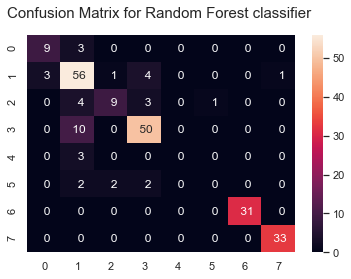

In [94]:
cm = confusion_matrix(y_test,predrf)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predrf),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

### Gradient Boosting Classifier

In [95]:
#Instantiating model and fitting model

gradient = GradientBoostingClassifier()
gradient.fit(X_train,y_train)

GradientBoostingClassifier()

In [96]:
# Performing Evaluation metrics for our model
predgrad = gradient.predict(X_test)
print('Accuracy Score for AdaBoost is :',round(accuracy_score(y_test,predgrad),4)*100,'% \n')
print('Confusion Matrix of AdaBoost : \n',confusion_matrix(y_test,predgrad), '\n')
print('Classification AdaBoost : \n',classification_report(y_test,predgrad))

Accuracy Score for AdaBoost is : 83.26 % 

Confusion Matrix of AdaBoost : 
 [[ 9  3  0  0  0  0  0  0]
 [ 3 54  3  5  0  0  0  0]
 [ 0  2 14  1  0  0  0  0]
 [ 0 10  1 49  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  3  2  0  0  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  1  0  0 32]] 

Classification AdaBoost : 
               precision    recall  f1-score   support

         0.0       0.75      0.75      0.75        12
         1.0       0.74      0.83      0.78        65
         2.0       0.67      0.82      0.74        17
         3.0       0.86      0.82      0.84        60
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         6
         6.0       1.00      1.00      1.00        31
         7.0       1.00      0.97      0.98        33

    accuracy                           0.83       227
   macro avg       0.63      0.65      0.64       227
weighted avg       0.81      0.83      0.82       227



### XGB Classifier

In [97]:
#Instantiating model and fitting model

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

[15:55:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
# Performing Evaluation metrics for our model
predxgb=xgb.predict(X_test)
print('Accuracy Score for XGB Classifier is :',round(accuracy_score(y_test,predxgb),4)*100,'% \n')
print('Confusion Matrix of XGB Classifier  : \n',confusion_matrix(y_test,predxgb), '\n')
print('Classification XGB Classifier  : \n',classification_report(y_test,predxgb))

Accuracy Score for XGB Classifier is : 80.17999999999999 % 

Confusion Matrix of XGB Classifier  : 
 [[ 8  4  0  0  0  0  0  0]
 [ 4 54  1  5  0  0  0  1]
 [ 0  2  9  5  0  1  0  0]
 [ 0 11  1 47  0  1  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  3  2  0  0  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 33]] 

Classification XGB Classifier  : 
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67        12
         1.0       0.72      0.83      0.77        65
         2.0       0.64      0.53      0.58        17
         3.0       0.80      0.78      0.79        60
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         6
         6.0       1.00      1.00      1.00        31
         7.0       0.97      1.00      0.99        33

    accuracy                           0.80       227
   macro avg       0.60      0.60      0.60       227
weighted avg       0.78      0.80      0.79      

array([[ 8,  4,  0,  0,  0,  0,  0,  0],
       [ 4, 54,  1,  5,  0,  0,  0,  1],
       [ 0,  2,  9,  5,  0,  1,  0,  0],
       [ 0, 11,  1, 47,  0,  1,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  3,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33]], dtype=int64)

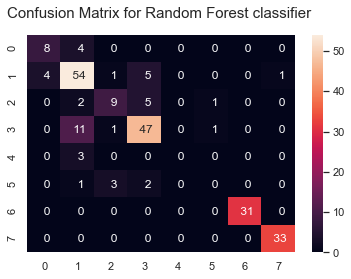

In [99]:
cm = confusion_matrix(y_test,predxgb)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predxgb),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

### Bagging Classifier

In [100]:
#Instantiating model and fitting model

BG = BaggingClassifier()
BG.fit(X_train,y_train)

BaggingClassifier()

In [101]:
# Performing Evaluation metrics for our model
predbg=BG.predict(X_test)
print('Accuracy Score for Bagging Classifier is :',round(accuracy_score(y_test,predbg),4)*100,'% \n')
print('Confusion Matrix of Bagging Classifier is : \n',confusion_matrix(y_test,predbg), '\n')
print('Classification  for Bagging Classifier : \n',classification_report(y_test,predbg))

Accuracy Score for Bagging Classifier is : 81.5 % 

Confusion Matrix of Bagging Classifier is : 
 [[10  2  0  0  0  0  0  0]
 [ 4 52  2  6  0  1  0  0]
 [ 0  4  9  4  0  0  0  0]
 [ 0  8  2 50  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  4  1  0  0  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 33]] 

Classification  for Bagging Classifier : 
               precision    recall  f1-score   support

         0.0       0.71      0.83      0.77        12
         1.0       0.74      0.80      0.77        65
         2.0       0.53      0.53      0.53        17
         3.0       0.82      0.83      0.83        60
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         6
         6.0       1.00      1.00      1.00        31
         7.0       1.00      1.00      1.00        33

    accuracy                           0.81       227
   macro avg       0.60      0.62      0.61       227
weighted avg       0.79      0.81      0.80 

array([[10,  2,  0,  0,  0,  0,  0,  0],
       [ 4, 52,  2,  6,  0,  1,  0,  0],
       [ 0,  4,  9,  4,  0,  0,  0,  0],
       [ 0,  8,  2, 50,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  4,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33]], dtype=int64)

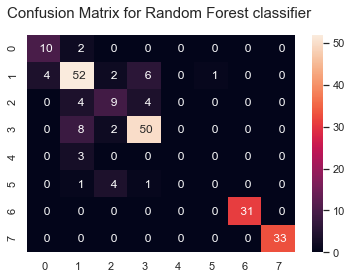

In [102]:
cm = confusion_matrix(y_test,predbg)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predbg),annot=True,fmt='3.0f',cmap="rocket")
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

#### Evaluation using Cross Validation Scores

In [103]:

CVscore_DT = cross_val_score(DT,X,y,cv = 10 )
print("Cross validation score of Decision Tree is :", round(CVscore_DT.mean(),4)*100,'%')

CVscore_Knn = cross_val_score(knn,X,y,cv = 10 )
print("Cross validation score of KNeighbors Classifier :", round(CVscore_Knn.mean(),4)*100,'%')

CVscore_RF = cross_val_score(RF,X,y,cv = 10 )
print("Cross validation score of Random Forest Classifier :", round(CVscore_RF.mean(),4)*100,'%')

CVscore_grad = cross_val_score(gradient,X,y,cv = 10 )
print("Cross validation score of Gradient Boosting Classifier is :",round(CVscore_grad.mean(),4)*100,'%')

CVscore_xgb = cross_val_score(xgb,X,y,cv = 10 )
print("Cross validation score of XGB Classifier is :",round(CVscore_xgb.mean(),4)*100,'%')

CVscore_BG = cross_val_score(BG,X,y, cv = 10)
print("Cross validation score of Bagging Classifier:", round(CVscore_BG.mean(),3)*100,'%')

Cross validation score of Decision Tree is : 81.17 %
Cross validation score of KNeighbors Classifier : 72.24000000000001 %
Cross validation score of Random Forest Classifier : 86.13 %
Cross validation score of Gradient Boosting Classifier is : 85.24000000000001 %
[15:56:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in 

### Conclusion :
- Among all other models Gradient Boosting Classification Model seems to giving us high scores among all evaluation metrics : 
    - Accuracy Score: 0.83
    - Precision : 0.85
    - Recall : 0.86
    - F1 : 0.85
    - Cross validation : 0.85

### Hyperparameter Tuning of Best Model.

In [104]:
params = {'min_samples_leaf':[1,2,3,4,5],
         'n_estimators' : [70,80,90,100],
         'criterion' : ['friedman_mse','mse'],
         'max_depth':[3,5,7,9],
         'min_samples_split':[2,3,4,5,6]}

In [107]:
#Instantiating Randomized SearchCV
randomcv = RandomizedSearchCV(estimator = gradient, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42)

In [108]:
#fitting our random search cv model
randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=mse, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   2.6s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   2.2s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   2.3s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   3.4s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   3.3s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   3.8s
[CV] END criterion=friedman_mse, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END criterion=friedman_mse, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.6s
[C

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'criterion': ['friedman_mse', 'mse'],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [109]:
#To check the best parameters to increase model Accuracy
randomcv.best_params_

{'n_estimators': 90,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 7,
 'criterion': 'mse'}

In [110]:
#Instantiating Our Final Model
Model1 = GradientBoostingClassifier(n_estimators = 90,min_samples_split =6, min_samples_leaf = 3, max_depth = 7, criterion = 'mse')

In [111]:
#Fitting our Tuned Model
Model1.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=7, min_samples_leaf=3,
                           min_samples_split=6, n_estimators=90)

In [112]:
# Performing Evaluation metrics for our model
y_pred = Model1.predict(X_test)
print('Accuracy Score for Gradient Boosting Classifier is :',round(accuracy_score(y_test,y_pred),4)*100,'% \n')
print('Confusion Matrix of Gradient Boosting Classifier : \n',confusion_matrix(y_test,y_pred), '\n')
print('Classification Random Gradient Boosting : \n',classification_report(y_test,y_pred))

Accuracy Score for Gradient Boosting Classifier is : 83.7 % 

Confusion Matrix of Gradient Boosting Classifier : 
 [[ 8  4  0  0  0  0  0  0]
 [ 2 58  1  4  0  0  0  0]
 [ 0  4 10  1  1  1  0  0]
 [ 0  8  2 50  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  3  2  0  0  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 33]] 

Classification Random Gradient Boosting : 
               precision    recall  f1-score   support

         0.0       0.80      0.67      0.73        12
         1.0       0.74      0.89      0.81        65
         2.0       0.62      0.59      0.61        17
         3.0       0.88      0.83      0.85        60
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         6
         6.0       1.00      1.00      1.00        31
         7.0       1.00      1.00      1.00        33

    accuracy                           0.84       227
   macro avg       0.63      0.62      0.62       227
weighted avg       0.82   

array([[ 8,  4,  0,  0,  0,  0,  0,  0],
       [ 2, 58,  1,  4,  0,  0,  0,  0],
       [ 0,  4, 10,  1,  1,  1,  0,  0],
       [ 0,  8,  2, 50,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  3,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33]], dtype=int64)

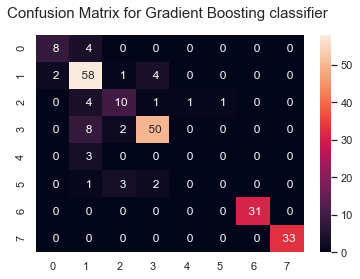

In [113]:
cm = confusion_matrix(y_test,y_pred)

#visualize confusion matrix 

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Gradient Boosting classifier ', y=1.05, size=15)
cm

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

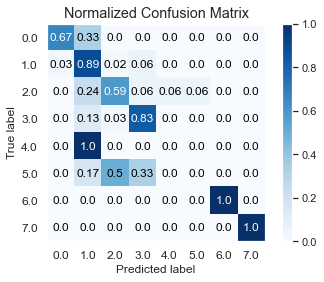

In [114]:
#Plotting Confusion Matrix Gradient Boosting Classifier model
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

## Saving Final Model

In [115]:
joblib.dump(Model1,"GlobalPowerPlantPrimaryFuelAnalysis.pkl")

['GlobalPowerPlantPrimaryFuelAnalysis.pkl']

## Loading Model

In [116]:
Model1 = joblib.load("GlobalPowerPlantPrimaryFuelAnalysis.pkl")

In [117]:
#predicting test data using loaded model
prediction = Model1.predict(X_test)
prediction

array([1., 1., 3., 1., 1., 1., 3., 1., 3., 1., 1., 3., 3., 6., 6., 3., 3.,
       7., 2., 3., 7., 1., 6., 7., 3., 1., 1., 3., 3., 3., 6., 2., 7., 7.,
       1., 1., 4., 1., 6., 7., 3., 3., 3., 1., 1., 7., 1., 3., 7., 1., 3.,
       2., 1., 1., 1., 7., 1., 2., 3., 3., 1., 1., 7., 1., 3., 6., 2., 1.,
       0., 6., 1., 7., 1., 1., 0., 1., 1., 7., 3., 7., 1., 3., 1., 6., 6.,
       1., 0., 3., 1., 3., 6., 3., 1., 5., 1., 7., 1., 1., 1., 1., 0., 3.,
       7., 3., 6., 3., 1., 1., 1., 1., 1., 2., 7., 3., 6., 6., 3., 1., 3.,
       3., 6., 6., 3., 6., 3., 1., 7., 2., 1., 3., 7., 1., 2., 3., 6., 1.,
       3., 3., 6., 3., 3., 3., 1., 0., 3., 3., 3., 6., 7., 2., 1., 6., 7.,
       3., 1., 2., 2., 1., 1., 7., 1., 1., 0., 1., 6., 7., 6., 6., 6., 2.,
       1., 7., 3., 3., 6., 2., 1., 0., 1., 7., 6., 1., 1., 7., 1., 1., 1.,
       7., 7., 7., 7., 3., 1., 1., 1., 0., 3., 3., 2., 3., 1., 2., 3., 1.,
       6., 7., 2., 6., 6., 0., 6., 7., 1., 3., 1., 3., 7., 1., 3., 7., 3.,
       1., 6., 0., 1., 1.

In [118]:
#Analysing Predicted vs Actual
results = pd.DataFrame()
results['Predicted'] = prediction
results['Actual'] = y
results

Predicted  Actual
0          1.0     6.0
1          1.0     1.0
2          3.0     7.0
3          1.0     2.0
4          1.0     1.0
..         ...     ...
222        6.0     3.0
223        0.0     2.0
224        1.0     1.0
225        1.0     7.0
226        3.0     3.0

[227 rows x 2 columns]

In [119]:
#Converting the saved file into .csv format
results.to_csv('Results.csv',index = True)

## Regression Models to predict generation capacity of fuel (capacity_mw)

In [120]:
#Cleaned Dataset
df.head()

capacity_mw  commissioning_year  year_of_capacity_data  \
0     1.357209              2011.0                    0.0   
1     4.610436              2000.0                    0.0   
2     3.396999              2000.0                    0.0   
3     5.129928              2004.0                    1.0   
4    12.164404              2015.0                    1.0   

   generation_data_source  generation_2013  generation_2014  generation_2015  \
0                       0        13.207822        13.426474        13.414776   
1                       0        13.207822        13.426474        13.414776   
2                       0        13.207822        13.426474        13.414776   
3                       1         8.580676         8.516872         9.449397   
4                       1        11.860159        14.479241        18.086385   

   generation_2016  generation_2017  Latitude  Longitude  owner  primary_fuel  \
0        13.488213        13.629310   28.1839    73.2407  229.0           6.0   
1        13.488213        13.629310   24.7663    74.6090  258.0           1.0   
2        13.488213        13.629310   21.9038    69.3732    2.0           7.0   
3         9.604586         8.723154   23.8712    91.3602  280.0           2.0   
4        18.413278        17.528476   21.9603    82.4091  280.0           1.0   

   source  geolocation_source  
0   109.0                 1.0  
1   174.0                 2.0  
2    21.0                 2.0  
3    22.0                 2.0  
4    22.0                 2.0

In [121]:
#Splitting Dataset into Features and Target variable
X = df.drop('capacity_mw',axis = 1)
y = df['capacity_mw']

In [122]:
#Splitting Dataset into Trainin(70%) and Testing(30%) Data.
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

#### Importing Necessary Regression Model Libraries

In [123]:
#Importing Predictive Models 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from scipy.stats import uniform 
from sklearn.model_selection import RandomizedSearchCV


#Importing model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

#Importing Lasso and Ridge for Regularization
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

### Linear Regression model

In [124]:
#Model instantiating and fitting
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [125]:
#Printing model confidence on training set and testing set
print("Linear Regression Model Confidence on training set : ",round(lm.score(X_train,y_train)*100,2),'%')
print("Linear Regression Model Confidence on testing set : ",round(lm.score(X_test,y_test)*100,2),'%')

Linear Regression Model Confidence on training set :  83.85 %
Linear Regression Model Confidence on testing set :  81.85 %


In [126]:
#Performing Model Predictions on X_test
y_pred = lm.predict(X_test)

In [127]:
#printing Intercept and weights our Linear Regression Model
print("Intercept for Linear Regression Model is : ",lm.intercept_,'\n')
weights = zip(X.columns,lm.coef_)
weights = pd.DataFrame(list(weights), columns = ['features', 'coefficients'])
print("Features and their corresponding weights:")
weights

Intercept for Linear Regression Model is :  -62.56402682456794 

Features and their corresponding weights:


features  coefficients
0       commissioning_year      0.031658
1    year_of_capacity_data     -0.716399
2   generation_data_source      6.148622
3          generation_2013      0.083981
4          generation_2014     -0.005655
5          generation_2015      0.069559
6          generation_2016     -0.027184
7          generation_2017      0.270998
8                 Latitude     -0.018390
9                Longitude     -0.033996
10                   owner      0.000807
11            primary_fuel     -0.137483
12                  source     -0.002177
13      geolocation_source      0.236127

In [128]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Linear Regression Model:', r2_score(y_test,y_pred))
print('Mean Absolute Error for our Linear Regression Model:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error for our Linear Regression Model:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for our Linear Regression Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

R squared for our Linear Regression Model: 0.8184807875619978
Mean Absolute Error for our Linear Regression Model: 0.9981779910351113
Mean Squared Error for our Linear Regression Model: 1.765939863643054
Root Mean Squared Error for our Linear Regression Model: 1.3288867008300798


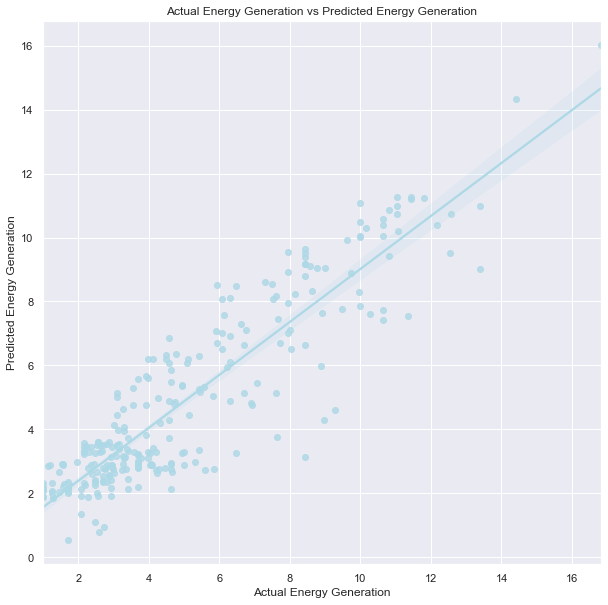

In [129]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=y_pred,data=X, color = 'lightblue')
plt.xlabel('Actual Energy Generation')
plt.ylabel('Predicted Energy Generation')
plt.title('Actual Energy Generation vs Predicted Energy Generation')
plt.show()

### Regularization with Lasso

In [130]:
#LassoCV(lasso cross validation) will return the best alpha after max iterations
#normalizing is subtracting the mean and dividing by l2-norm
lasscv = LassoCV(alphas=None, max_iter=2000, normalize = True)
lasscv.fit(X_train,y_train)
alpha = lasscv.alpha_
alpha

0.0006620185209087136

In [131]:
#Now that we have best parameter, let's use lasso regression and see how well our data has fitted before
alpha = lasscv.alpha_

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.0006620185209087136)

In [132]:
#Model Confidence After using Lasso Regression
print('Model Confidence After using Lasso Regularization Model: ',round(lasso_reg.score(X_test,y_test),3)*100, '%')

Model Confidence After using Lasso Regularization Model:  81.8 %


In [133]:
#Applying Evaluation metrics to our Tuned Lasso Regression model
lassopred = lasso_reg.predict(X_test)

print('R2 Score for Tuned Lasso Regression Model:', r2_score(y_test,lassopred))
print('Mean Absolute Error for our Tuned Lasso Regression Model:',mean_absolute_error(y_test,lassopred))
print('Mean Squared Error for our Tuned Lasso Regression Model:',mean_squared_error(y_test,lassopred))
print('Root Mean Squared Error for our Lasso Linear Regression Model:',np.sqrt(mean_squared_error(y_test,lassopred)))

R2 Score for Tuned Lasso Regression Model: 0.8184787684164297
Mean Absolute Error for our Tuned Lasso Regression Model: 0.9981877917606019
Mean Squared Error for our Tuned Lasso Regression Model: 1.7659595072367065
Root Mean Squared Error for our Lasso Linear Regression Model: 1.3288940918059295


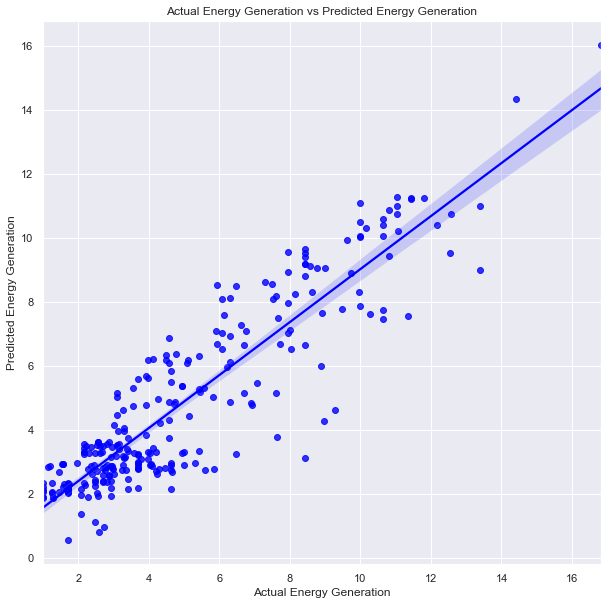

In [134]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=lassopred,data=X, color = 'blue')
plt.xlabel('Actual Energy Generation')
plt.ylabel('Predicted Energy Generation')
plt.title('Actual Energy Generation vs Predicted Energy Generation')
plt.show()

### Decision Tree Regressor

In [135]:
#Model instantiating and fitting

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [136]:
#Applying Evaluation metrics to our Regression model
prd = dt.predict(X_test)

print('R squared for our Linear Regression Model:', r2_score(y_test,prd))
print('Mean Absolute Error for our Linear Regression Model:',mean_absolute_error(y_test,prd))
print('Mean Squared Error for our Linear Regression Model:',mean_squared_error(y_test,prd))
print('Root Mean Squared Error for our Linear Regression Model:',np.sqrt(mean_squared_error(y_test,prd)))

R squared for our Linear Regression Model: 0.7810828927225241
Mean Absolute Error for our Linear Regression Model: 1.0448046837945075
Mean Squared Error for our Linear Regression Model: 2.129771506731051
Root Mean Squared Error for our Linear Regression Model: 1.4593736693290897


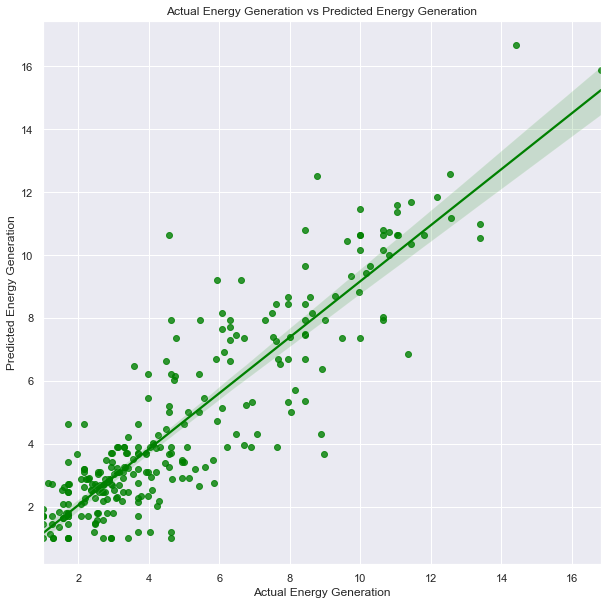

In [137]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=prd,data=X, color = 'green')
plt.xlabel('Actual Energy Generation')
plt.ylabel('Predicted Energy Generation')
plt.title('Actual Energy Generation vs Predicted Energy Generation')
plt.show()

### Random Forest Regressor

In [138]:
# Model Instantiating and fitting
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
r2_score(y_test,pred)

0.8693518010406717

In [139]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Random Forest Regressor Model:', r2_score(y_test,pred))
print('Mean Absolute Error for our Random Forest Regressor Model:',mean_absolute_error(y_test,pred))
print('Mean Squared Error for our Random Forest Regressor Model:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error for our Random Forest Regressor Model:',np.sqrt(mean_squared_error(y_test,pred)))

R squared for our Random Forest Regressor Model: 0.8693518010406717
Mean Absolute Error for our Random Forest Regressor Model: 0.8158183383299944
Mean Squared Error for our Random Forest Regressor Model: 1.2710327438989315
Root Mean Squared Error for our Random Forest Regressor Model: 1.1274008798554893


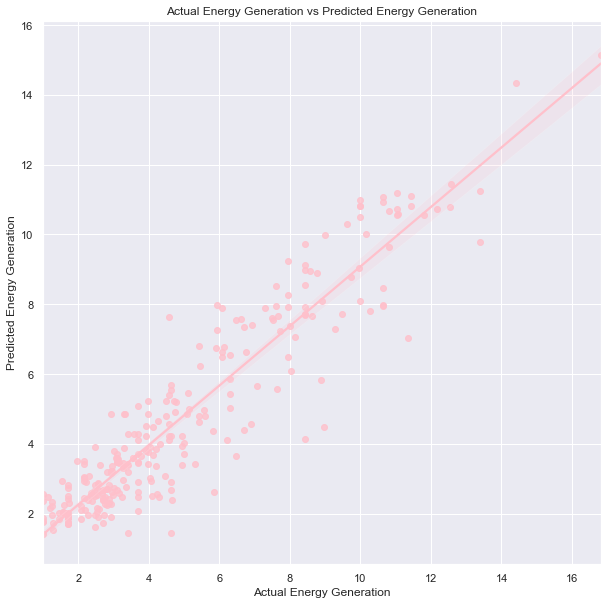

In [140]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=pred,data=df, color = 'pink')
plt.xlabel('Actual Energy Generation')
plt.ylabel('Predicted Energy Generation')
plt.title('Actual Energy Generation vs Predicted Energy Generation')
plt.show()

### Regularization with Ridge

In [141]:
#Ridge will return best alpha and coefficients after performing 10 cross validations
ridgecv = RidgeCV(alphas= np.arange(0.001,0.2,0.001),normalize=True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.0...
       0.136, 0.137, 0.138, 0.139, 0.14 , 0.141, 0.142, 0.143, 0.144,
       0.145, 0.146, 0.147, 0.148, 0.149, 0.15 , 0.151, 0.152, 0.153,
       0.154, 0.155, 0.156, 0.157, 0.158, 0.159, 0.16 , 0.161, 0.162,
       0.163, 0.164, 0.165, 0.166, 0.167, 0.168, 0.169, 0.17 , 0.171,
       0.172, 0.173, 0.174, 0.175, 0.176, 0.177, 0.178, 0.179, 0.18 ,
       0.181, 0.182, 0.183, 0.184, 0.185, 0.186, 0.187, 0.188, 0.189,
       0.19 , 0.191, 0.192, 0.193, 0.194, 0.195, 0.196, 0.197, 0.198,
       0.199]),
        normalize=True)

In [142]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.007)

In [143]:
#Applying Evaluation metrics to our Tuned Ridge Regression model
ridgepred = ridge_model.predict(X_test)

print('R2 Score for Tuned Ridge Regression Model:', r2_score(y_test,ridgepred))
print('Mean Absolute Error for our Tuned Ridge Regression Model:',mean_absolute_error(y_test,ridgepred))
print('Mean Squared Error for our Tuned Ridge Regression Model:',mean_squared_error(y_test,ridgepred))
print('Root Mean Squared Error for our Ridge Linear Regression Model:',np.sqrt(mean_squared_error(y_test,ridgepred)))

R2 Score for Tuned Ridge Regression Model: 0.8184838259669541
Mean Absolute Error for our Tuned Ridge Regression Model: 0.9981675024102391
Mean Squared Error for our Tuned Ridge Regression Model: 1.7659103040148356
Root Mean Squared Error for our Ridge Linear Regression Model: 1.3288755788315307


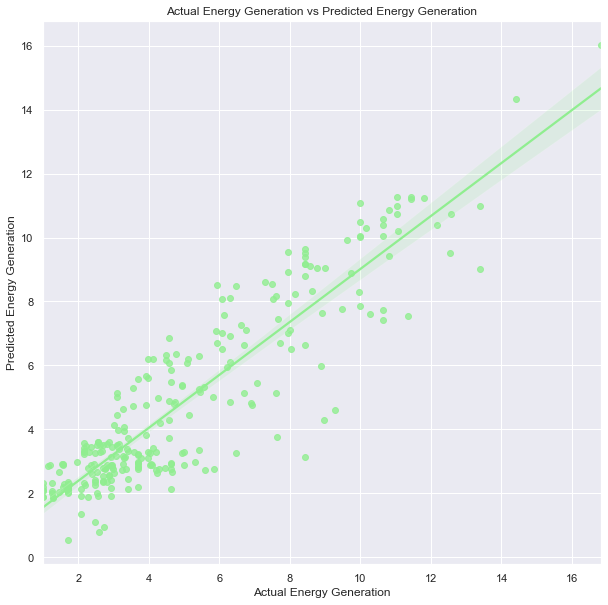

In [144]:
#Plotting Regression Line
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=ridgepred,data=df, color = 'lightgreen')
plt.xlabel('Actual Energy Generation')
plt.ylabel('Predicted Energy Generation')
plt.title('Actual Energy Generation vs Predicted Energy Generation')
plt.show()

### Ordinary least square using stats model

In [145]:
lm1 = smf.ols(formula = 'y ~ X',data = df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     320.3
Date:                Sun, 08 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:14:41   Log-Likelihood:                -1542.7
No. Observations:                 908   AIC:                             3115.
Df Residuals:                     893   BIC:                             3187.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -63.1368      7.434     -8.493      0.000     -77.726     -48.547
X[0]           0.0322      0.004      8.693      0.000       0.025       0.039
X[1]          -0.7076      0.268     -2.644      0.008      -1.233      -0.182
X[2]           6.0918      0.185     32.945      0.000       5.729       6.455
X[3]           0.1067      0.033      3.223      0.001       0.042       0.172
X[4]          -0.0348      0.037     -0.936      0.349      -0.108       0.038
X[5]           0.0523      0.034      1.542      0.123      -0.014       0.119
X[6]          -0.0046      0.047     -0.098      0.922      -0.097       0.088
X[7]           0.2687      0.034      7.873      0.000       0.202       0.336
X[8]          -0.0137      0.008     -1.793      0.073      -0.029       0.001
X[9]          -0.0410      0.011     -3.888      0.000      -0.062      -0.020
X[10]          0.0007      0.001      0.674      0.500      -0.001       0.003
X[11]         -0.1262      0.034     -3.690      0.000      -0.193      -0.059
X[12]         -0.0030      0.002     -1.616      0.106      -0.007       0.001
X[13]          0.3269      0.109      3.012      0.003       0.114       0.540
==============================================================================
Omnibus:                      295.550   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1229.766
Skew:                           1.480   Prob(JB):                    9.11e-268
Kurtosis:                       7.873   Cond. No.                     3.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### XGB Regressor

In [146]:
#Model fitting and Instantiating
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [147]:
#Applying Evaluation metrics to our Tuned Ridge Regression model
xgbpred = xgb.predict(X_test)

print('R2 Score for XGB Regressor Model:', r2_score(y_test,xgbpred))
print('Mean Absolute Error for our Tuned XGB Regressor Model:',mean_absolute_error(y_test,xgbpred))
print('Mean Squared Error for our Tuned XGB Regressor Model:',mean_squared_error(y_test,xgbpred))
print('Root Mean Squared Error for our XGB Regressor Model:',np.sqrt(mean_squared_error(y_test,xgbpred)))

R2 Score for XGB Regressor Model: 0.8674580285799962
Mean Absolute Error for our Tuned XGB Regressor Model: 0.8040778890792962
Mean Squared Error for our Tuned XGB Regressor Model: 1.2894566244130587
Root Mean Squared Error for our XGB Regressor Model: 1.1355424362008928


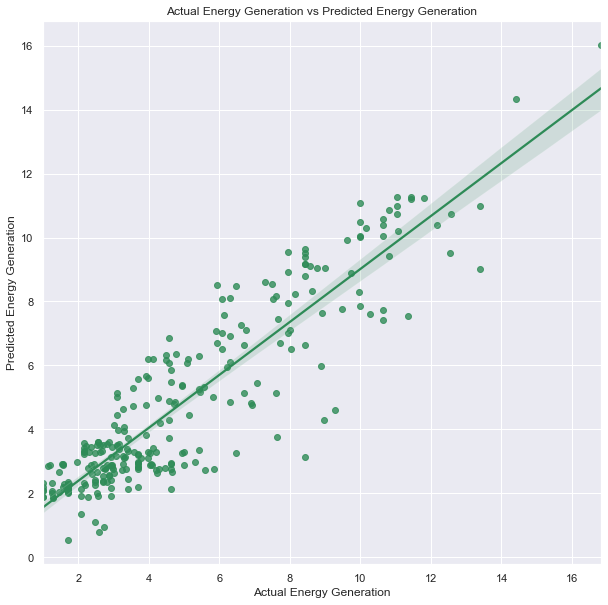

In [148]:
#Plotting Regression Line
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=ridgepred,data=df, color = 'seagreen')
plt.xlabel('Actual Energy Generation')
plt.ylabel('Predicted Energy Generation')
plt.title('Actual Energy Generation vs Predicted Energy Generation')
plt.show()

### Conclusion :
- Among all other models Random Forest Regressor Model seems to giving us high scores among all evaluation metrics : 
    - R_square Score: 0.88
    - MAE : 0.718
    - MSE : 1.077
    - RMSE : 1.037

### Hyperparameter Tuning of Our Best Model

In [149]:
grid = {'n_estimators': [20,40,60,80,100],
       'criterion': ['mse','mae'],
       'max_depth': [3,4,5,6,7,8],
       "min_samples_split" : [1,2,3,4,5,6],
       "min_samples_leaf" : [1,2,3,4,5,6,7]}

In [150]:
#Instantiating Randomized SearchCV
randomcv = RandomizedSearchCV(estimator = rf, param_distributions = grid, n_iter = 100, cv = 3, verbose=2, random_state=42)

In [151]:
#Fitting our Random Search CV
randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=mse, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=40; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=40; total time=   0.0s
[CV] END criterion=mse, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=40; total time=   0.1s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=40; total time=   0.1s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=40; total time=   0.1s
[CV] END criterion=mse, max_depth=7, min_samples_leaf=5, min_samples_split=6, n_estimators=40; total time=   0.1s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END criterion=mse, m

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6],
                                        'n_estimators': [20, 40, 60, 80, 100]},
                   random_state=42, verbose=2)

In [156]:
#To check the best parameters to increase model Accuracy
randomcv.best_params_

{'n_estimators': 60,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_depth': 7,
 'criterion': 'mae'}

In [157]:
#Instantiating Our Final Model
Model2 = RandomForestRegressor(n_estimators = 60,min_samples_split = 3, min_samples_leaf = 2, max_depth = 7, criterion = 'mae')

In [158]:
#Fitting our final Model
Model2.fit(X_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=7, min_samples_leaf=2,
                      min_samples_split=3, n_estimators=60)

In [161]:
#Applying Evaluation metrics to our Tuned Random Forest Regression model
y_pred = Model2.predict(X_test)

print('R2 Score for Tuned Ridge Regression Model:', r2_score(y_test,y_pred))
print('Mean Absolute Error for our Tuned Ridge Regression Model:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error for our Tuned Ridge Regression Model:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for our Ridge Linear Regression Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score for Tuned Ridge Regression Model: 0.8566411110612848
Mean Absolute Error for our Tuned Ridge Regression Model: 0.8339544402580725
Mean Squared Error for our Tuned Ridge Regression Model: 1.3946908064672334
Root Mean Squared Error for our Ridge Linear Regression Model: 1.180970281788341


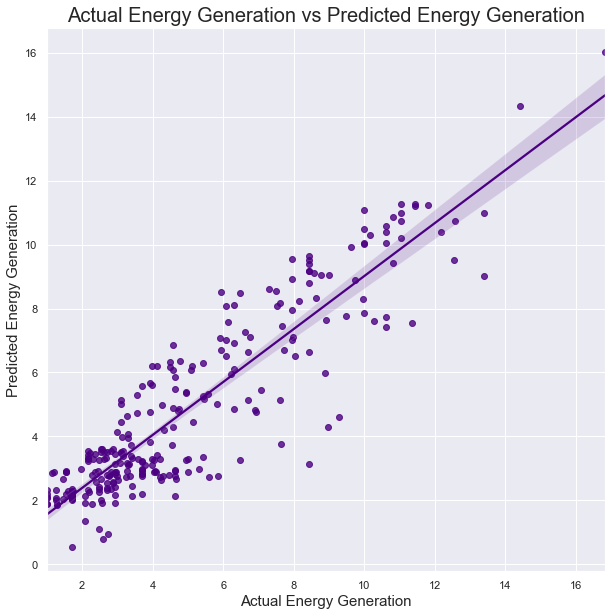

In [160]:
#Plotting Regression Line
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=y_pred,data=df, color = 'indigo')
plt.xlabel('Actual Energy Generation', fontsize = 15)
plt.ylabel('Predicted Energy Generation', fontsize = 15)
plt.title('Actual Energy Generation vs Predicted Energy Generation', fontsize = 20)
plt.show()

## Saving Final Model

In [162]:
joblib.dump(Model2,"GlobalPowerPlantEnergyGenerationAnalysis.pkl")

['GlobalPowerPlantEnergyGenerationAnalysis.pkl']

## Loading Model

In [163]:
Model2 = joblib.load("GlobalPowerPlantEnergyGenerationAnalysis.pkl")

In [164]:
#predicting test data using loaded model
prediction = Model2.predict(X_test)
prediction

array([ 8.49485942,  1.66085007,  3.31305699,  3.65015062,  2.85803188,
        3.28328786,  3.74341614, 10.82189912,  2.35241266,  4.93550174,
        2.75618453,  4.32247349,  1.92419347,  2.41916524,  2.18167147,
       10.75783287,  3.74300711, 10.49934616,  4.11216109,  2.76511332,
        2.49549843,  6.54836324,  7.18344393,  1.9657027 ,  1.70173213,
        5.41284074,  3.27620568,  4.20231783,  2.84415329,  2.33643888,
        2.73709212,  6.94035895,  4.96465015,  9.27151265,  5.14630896,
        4.83273698,  2.0551094 ,  3.28770222,  7.7265657 , 10.37172598,
        2.54181155,  3.86451275, 10.82701701,  4.12800322,  1.7083173 ,
        4.1108202 ,  4.18066314,  7.6553346 ,  2.37552069, 11.20967731,
        2.59357064,  3.28948167,  8.11671912,  8.76556912,  2.4502443 ,
        2.8957715 ,  3.6726244 ,  1.59833134,  3.82486297,  7.82430667,
        2.76588687,  2.0156693 ,  1.89936866,  3.31708253,  4.25857891,
        2.74591178,  2.77879419,  5.15580578,  5.49266713,  6.53

In [165]:
#Analysing Predicted vs Actual
results = pd.DataFrame()
results['Predicted'] = prediction
results['Actual'] = y
results

Predicted     Actual
0     8.494859   1.357209
1     1.660850   4.610436
2     3.313057   3.396999
3     3.650151   5.129928
4     2.858032  12.164404
..         ...        ...
268   2.643420   4.461398
269   7.844404   8.457691
270   1.720792   3.659306
271   3.295673   2.714418
272   1.605508   7.488872

[273 rows x 2 columns]

In [166]:
#Converting the saved file into .csv format
results.to_csv('Results2.csv',index = True)